In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [16]:
alpha = ["current_player_score","opponent_score","current_player_deadwood","current_player_num_hit_cards"]
beta = ["num_melds","point_sum_melds","num_combos","point_sum_combos","num_knock_cache","point_sum_knock_cache","num_load_cards","point_sum_load_cards","turns_taken"]
gamma = ["num_nearby_opponent_cards"]
delta = ["discard_danger"]

features = alpha + beta + gamma + delta

In [17]:
df = pd.read_csv('epsilon-3-f.csv')
display(df.T)

np.set_printoptions(edgeitems = 200, linewidth = 150)
# df.values

,0,1,2,3,4,5,6,7,8,9,...,63937,63938,63939,63940,63941,63942,63943,63944,63945,63946
current_player,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,...,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,1.000000
is_current_player_hand_winner,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.0,...,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,1.000000
is_current_player_game_winner,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.0,...,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.000000,1.000000
current_player_end_hand_score_advantage,-17.000000,17.000000,-17.000000,17.000000,-17.000000,17.0,-17.000000,17.000000,-17.000000,17.0,...,10.000000,-10.00000,10.000000,-10.000000,10.000000,-10.000000,10.00000,26.000000,-26.000000,26.000000
current_player_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,68.000000,0.00000,68.000000,0.000000,68.000000,0.000000,68.00000,78.000000,0.000000,78.000000
opponent_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,68.00000,0.000000,68.000000,0.000000,68.000000,0.00000,0.000000,78.000000,0.000000
current_player_deadwood,65.000000,44.000000,58.000000,44.000000,58.000000,43.0,58.000000,41.000000,55.000000,41.0,...,18.000000,26.00000,18.000000,26.000000,12.000000,18.000000,8.00000,25.000000,51.000000,10.000000
current_player_num_hit_cards,5.000000,3.000000,7.000000,3.000000,7.000000,5.0,7.000000,6.000000,7.000000,6.0,...,3.000000,5.00000,3.000000,5.000000,3.000000,2.000000,5.00000,8.000000,7.000000,2.000000
num_melds,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.0,...,2.000000,1.00000,2.000000,1.000000,2.000000,1.000000,2.00000,1.000000,1.000000,2.000000
point_sum_melds,0.000000,6.000000,0.000000,6.000000,0.000000,6.0,0.000000,6.000000,0.000000,6.0,...,56.000000,9.00000,56.000000,9.000000,56.000000,10.000000,56.00000,30.000000,29.000000,36.000000


In [12]:
# features for regression input
f =  features # ["num_melds","current_player_deadwood","turns_taken"]
# feature for regression output
g = "current_player_end_hand_score_advantage"

# feature for dependent plot
var = "discard_danger"


print("\n".join(f"**{el}**" if el == var else el for el in f))
print("-------")
print(g)

current_player_score
opponent_score
current_player_deadwood
current_player_num_hit_cards
num_melds
point_sum_melds
num_combos
point_sum_combos
num_knock_cache
point_sum_knock_cache
num_load_cards
point_sum_load_cards
turns_taken
num_nearby_opponent_cards
**discard_danger**
-------
is_current_player_game_winner


# Linear

CSV LINE:

0.6366654012,0.0060366039,-0.0059898049,-0.0028572000,-0.0053811957,0.0065329648,0.0007936258,0.0002588498,0.0014642989,-0.0056172727,-0.0010211611,-0.0323464542,0.0042499225,-0.0037370126,-0.0190126934,-0.0111189592 


R^2:   0.1578801063815266 




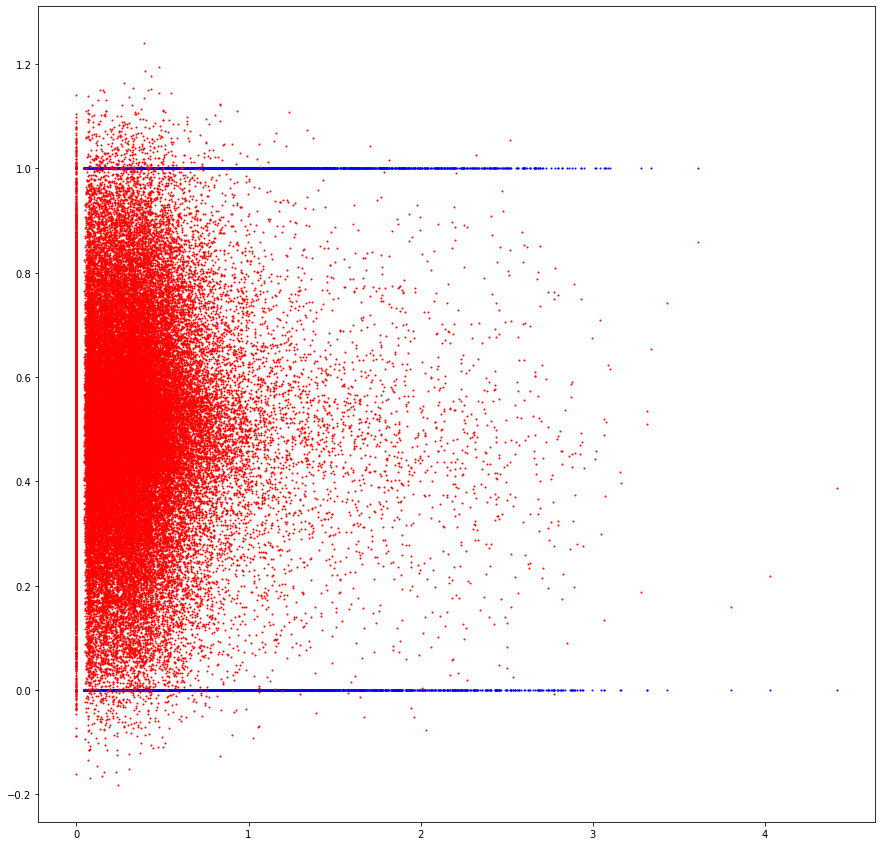

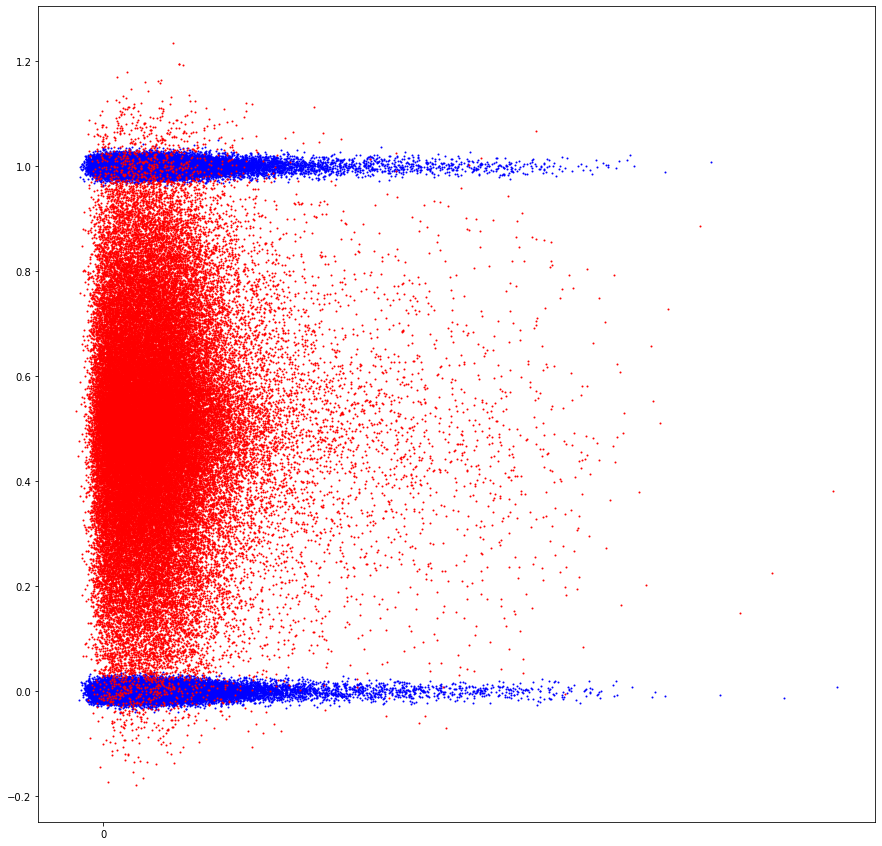

In [13]:
X = df[f]
y = df[[g]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
line =  '{0:.10f}'.format(linear_regressor.intercept_[0])
for i in range(len(features)):
    if features[i] in f:
        line += ',' + '{0:.10f}'.format(linear_regressor.coef_[0][f.index(features[i])])
    else:
        line += ",0"
print(line, "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)


fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[[g]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()

**current_player_score**
-------
is_current_player_game_winner
CSV LINE:

0.3745643433,0.0036367856,0,0,0,0,0,0,0,0,0,0,0,0,0,0 


R^2:   0.04963625104654312 




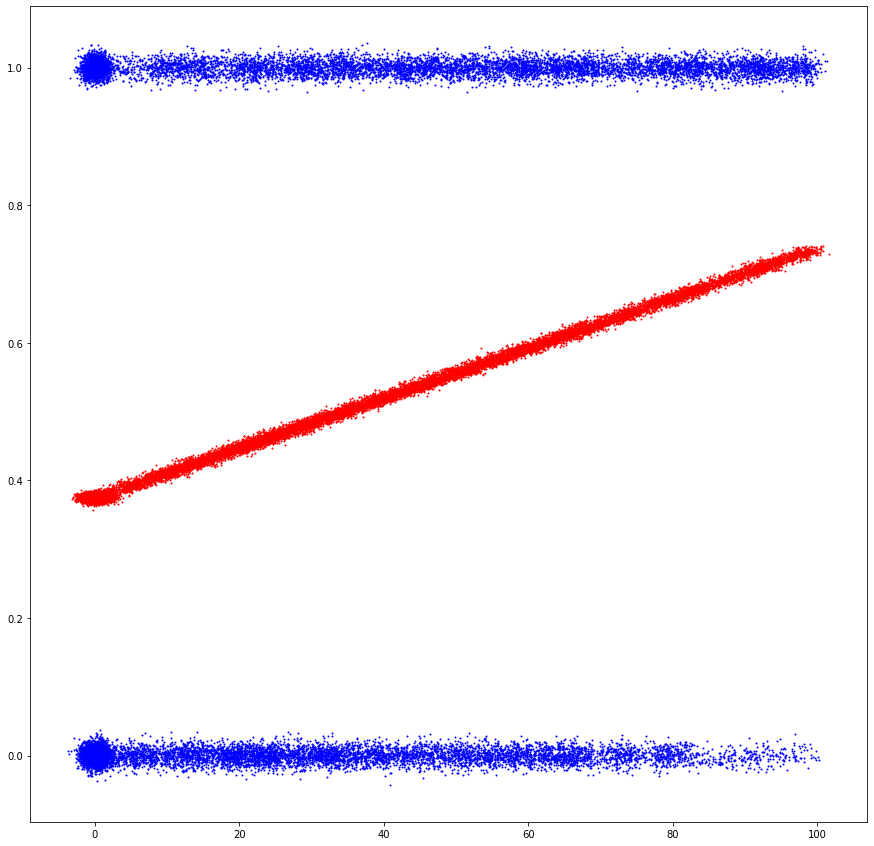

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**opponent_score**
-------
is_current_player_game_winner
CSV LINE:

0.6336134301,0,-0.0036051340,0,0,0,0,0,0,0,0,0,0,0,0,0 


R^2:   0.048938824739620745 




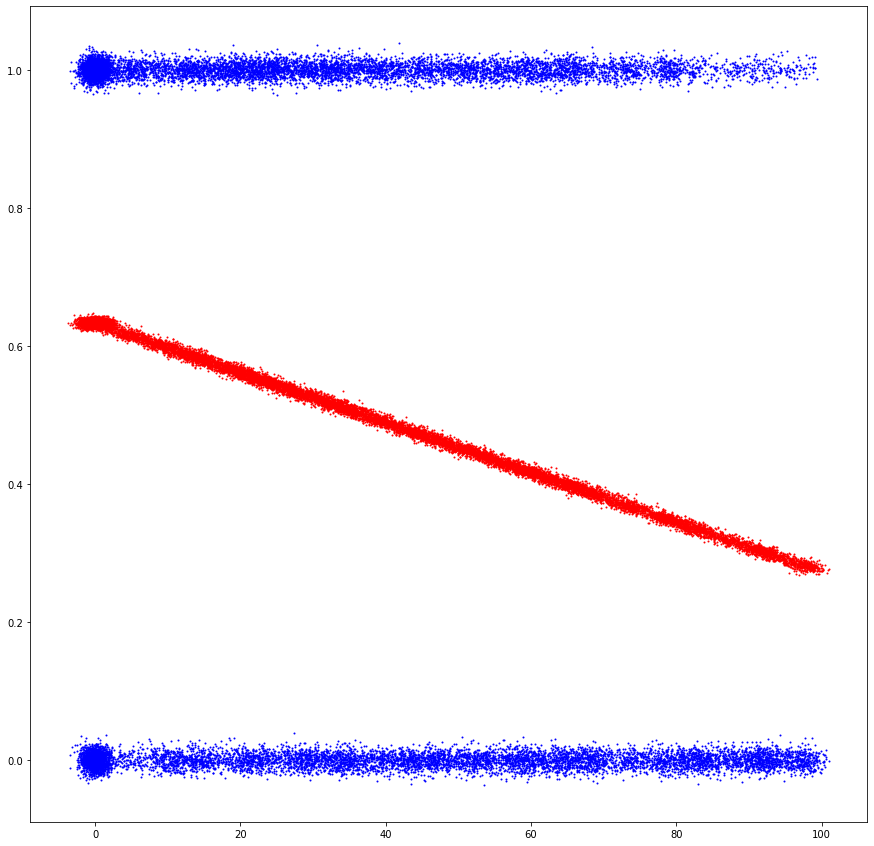

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**current_player_deadwood**
-------
is_current_player_game_winner
CSV LINE:

0.5667510346,0,0,-0.0020794258,0,0,0,0,0,0,0,0,0,0,0,0 


R^2:   0.004887104137448528 




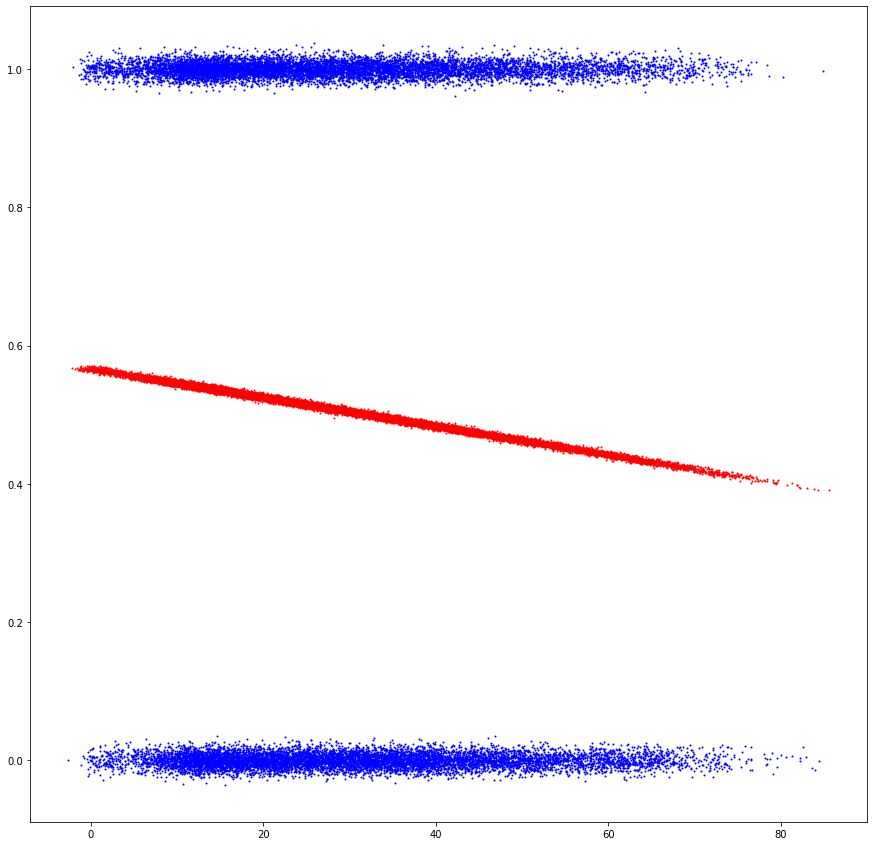

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**current_player_num_hit_cards**
-------
is_current_player_game_winner
CSV LINE:

0.5575327948,0,0,0,-0.0088896103,0,0,0,0,0,0,0,0,0,0,0 


R^2:   0.0019061662539296975 




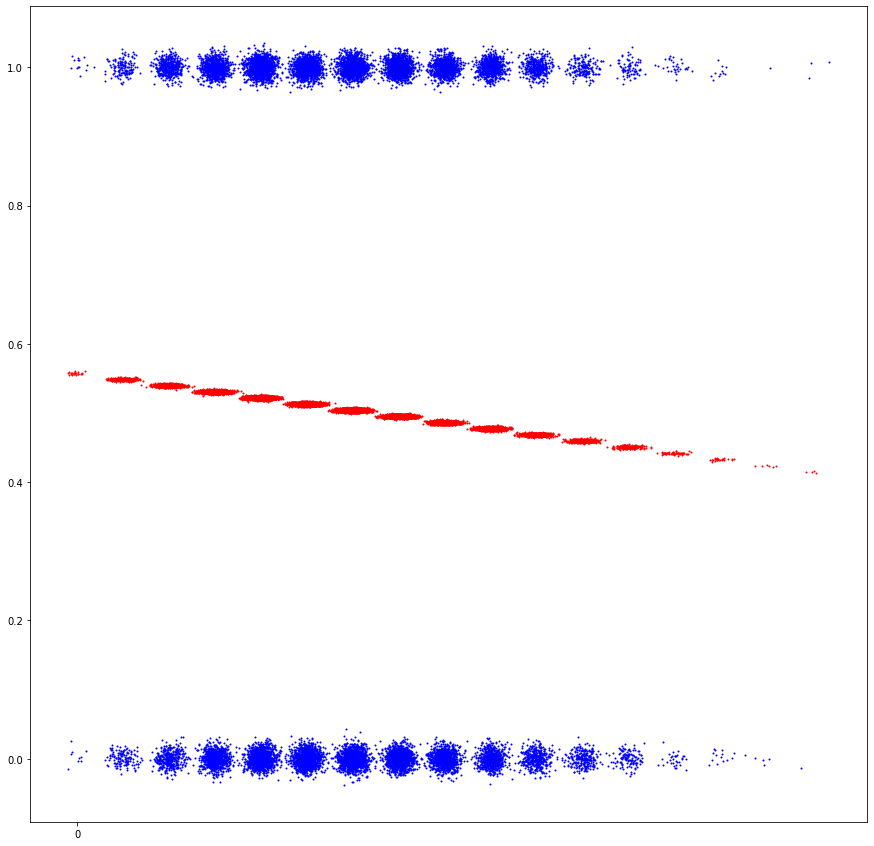

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**num_melds**
-------
is_current_player_game_winner
CSV LINE:

0.4419094144,0,0,0,0,0.0503206987,0,0,0,0,0,0,0,0,0,0 


R^2:   0.005648652155859635 




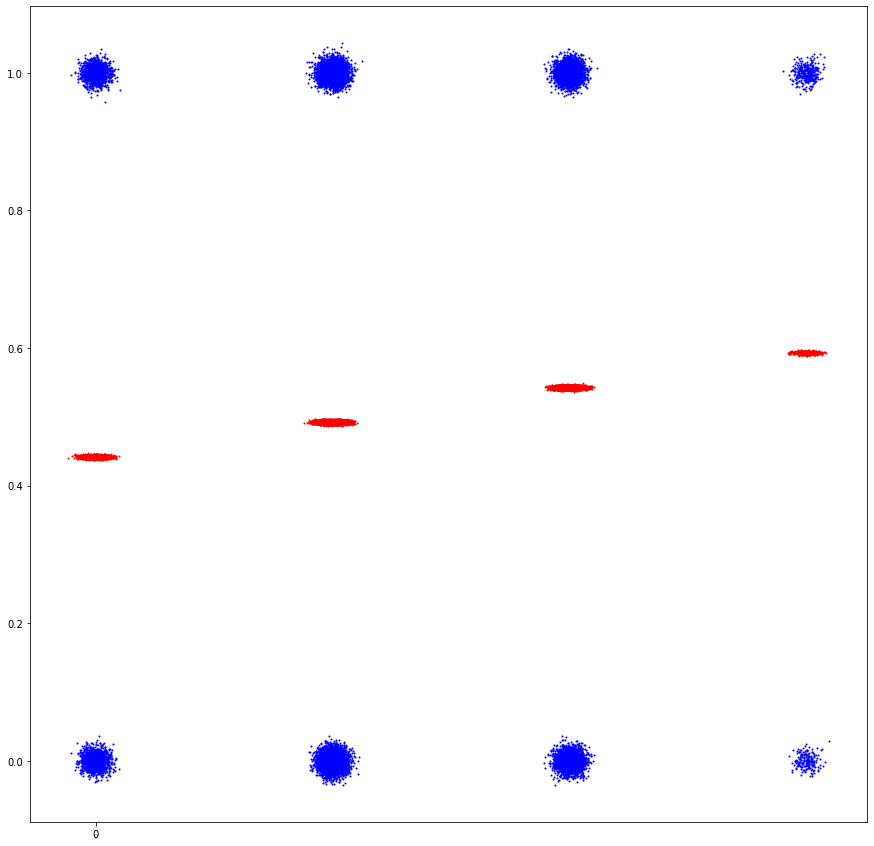

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**point_sum_melds**
-------
is_current_player_game_winner
CSV LINE:

0.4614370181,0,0,0,0,0,0.0017474489,0,0,0,0,0,0,0,0,0 


R^2:   0.003744425713122057 




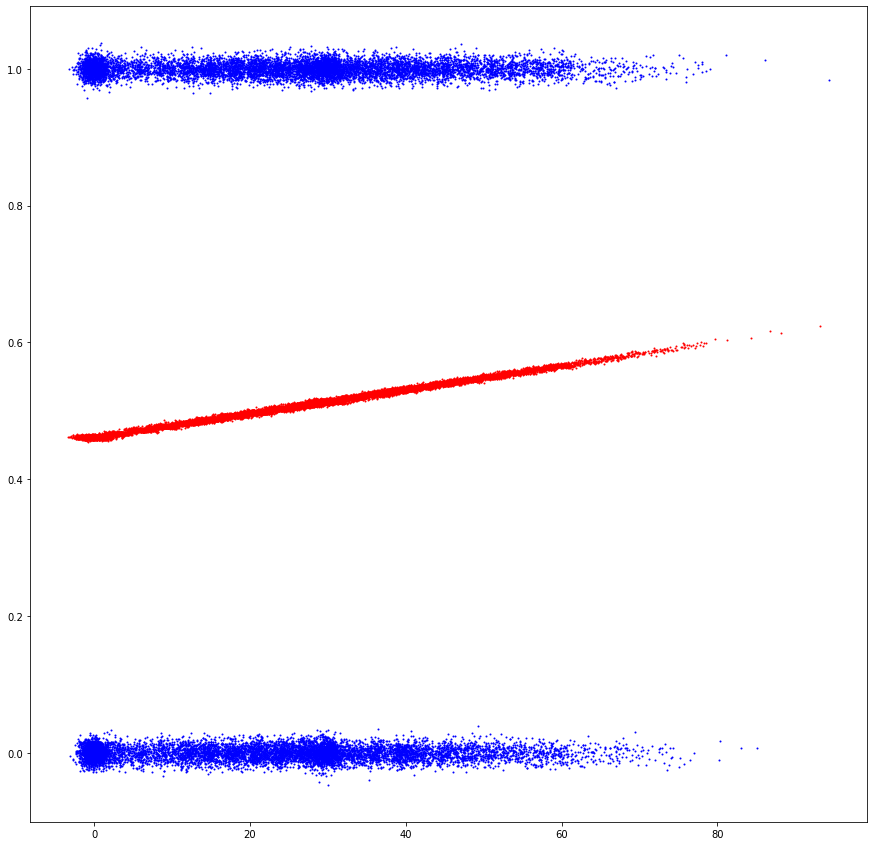

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**num_combos**
-------
is_current_player_game_winner
CSV LINE:

0.5473021178,0,0,0,0,0,0,-0.0177075890,0,0,0,0,0,0,0,0 


R^2:   0.003117553091006031 




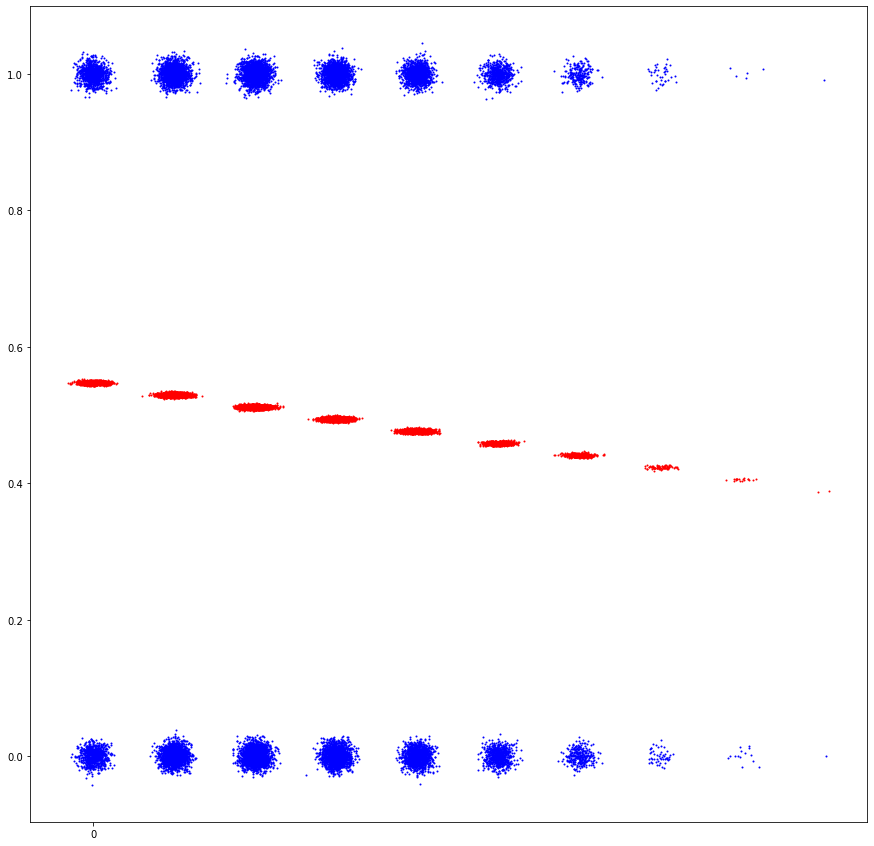

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**point_sum_combos**
-------
is_current_player_game_winner
CSV LINE:

0.5358317693,0,0,0,0,0,0,0,-0.0015807836,0,0,0,0,0,0,0 


R^2:   0.0029945818081016373 




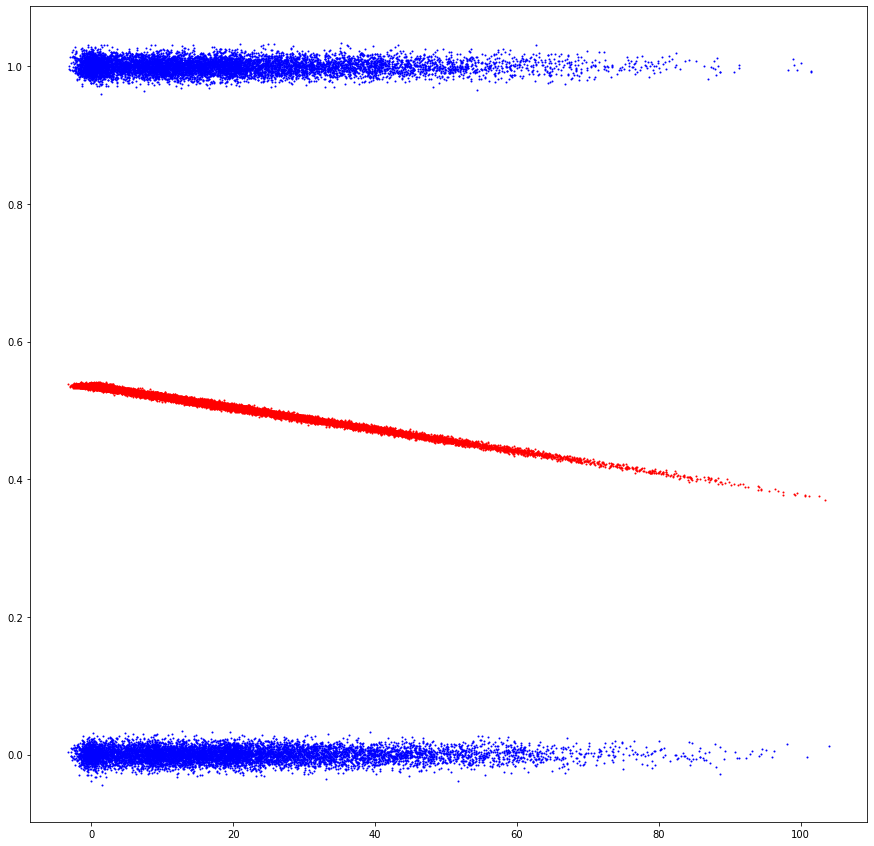

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**num_knock_cache**
-------
is_current_player_game_winner
CSV LINE:

0.5661657189,0,0,0,0,0,0,0,0,-0.0205931481,0,0,0,0,0,0 


R^2:   0.0015021732146316413 




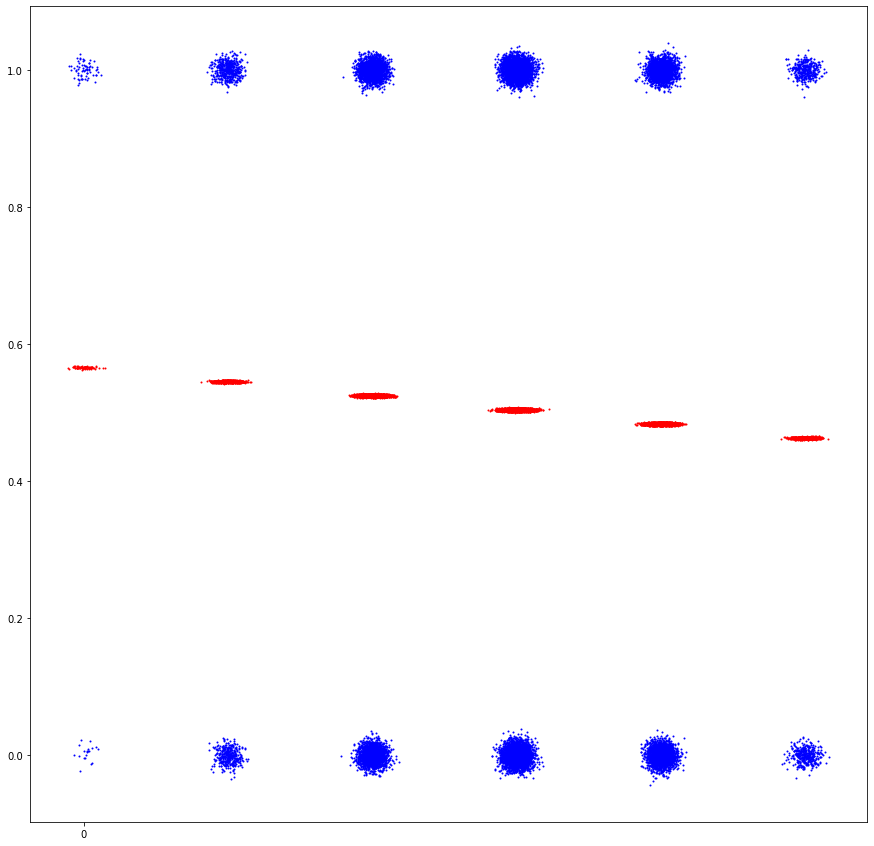

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**point_sum_knock_cache**
-------
is_current_player_game_winner
CSV LINE:

0.5483451954,0,0,0,0,0,0,0,0,0,-0.0093123848,0,0,0,0,0 


R^2:   0.000812175875238963 




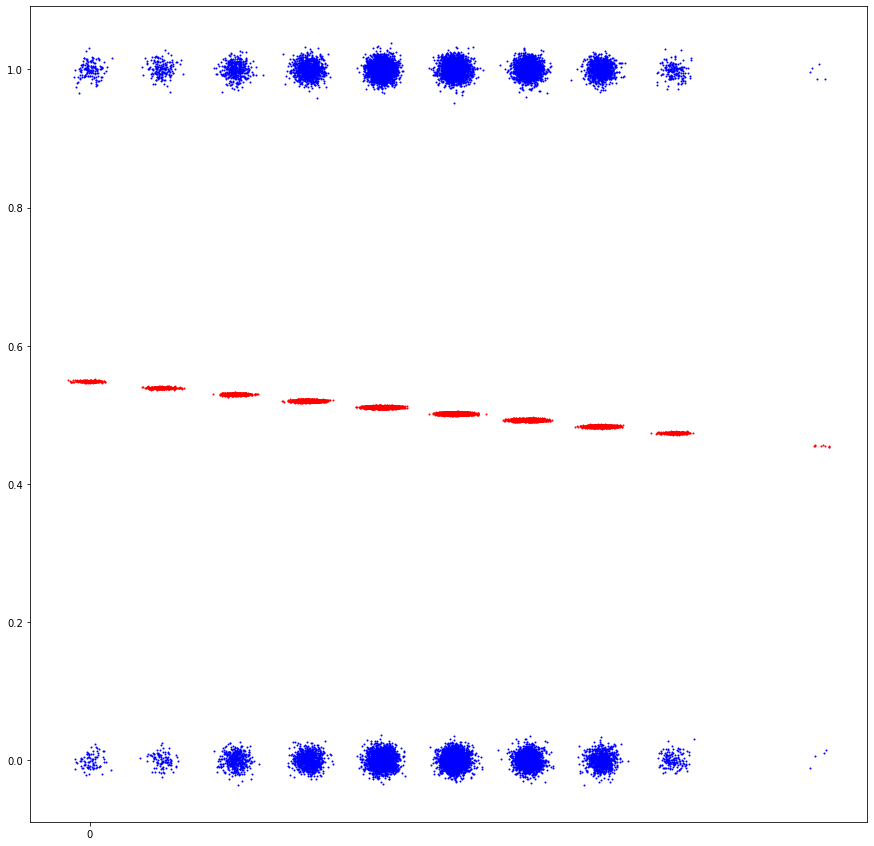

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**num_load_cards**
-------
is_current_player_game_winner
CSV LINE:

0.5215319442,0,0,0,0,0,0,0,0,0,0,-0.0191357535,0,0,0,0 


R^2:   0.0016396145261815542 




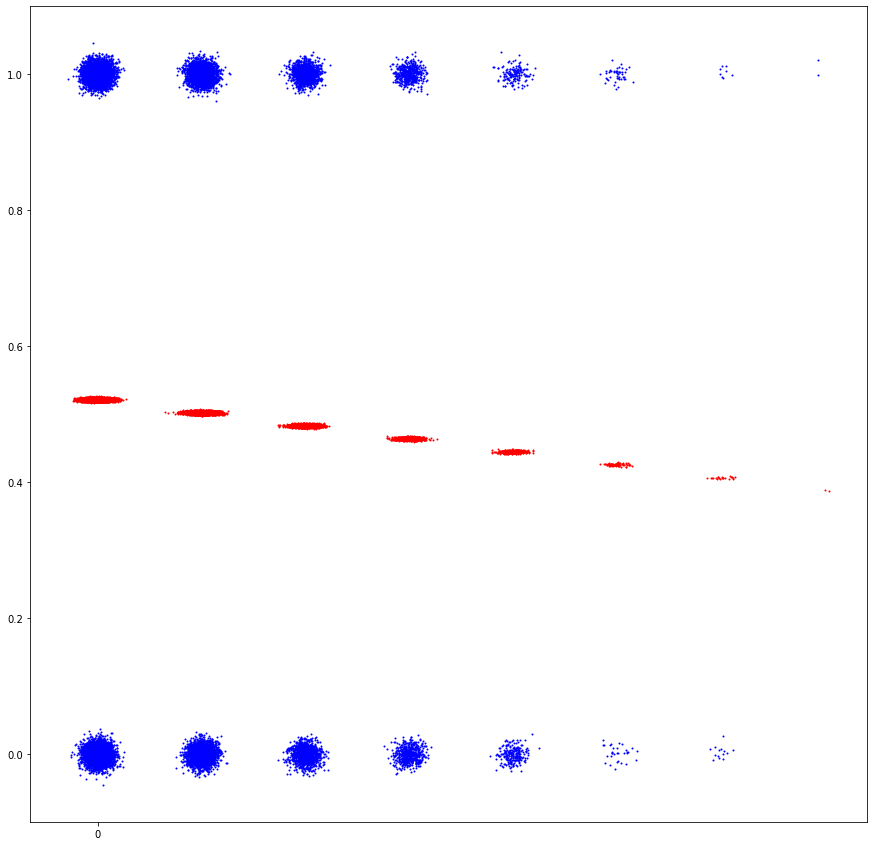

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**point_sum_load_cards**
-------
is_current_player_game_winner
CSV LINE:

0.5206871657,0,0,0,0,0,0,0,0,0,0,0,-0.0027934405,0,0,0 


R^2:   0.0017068051167825615 




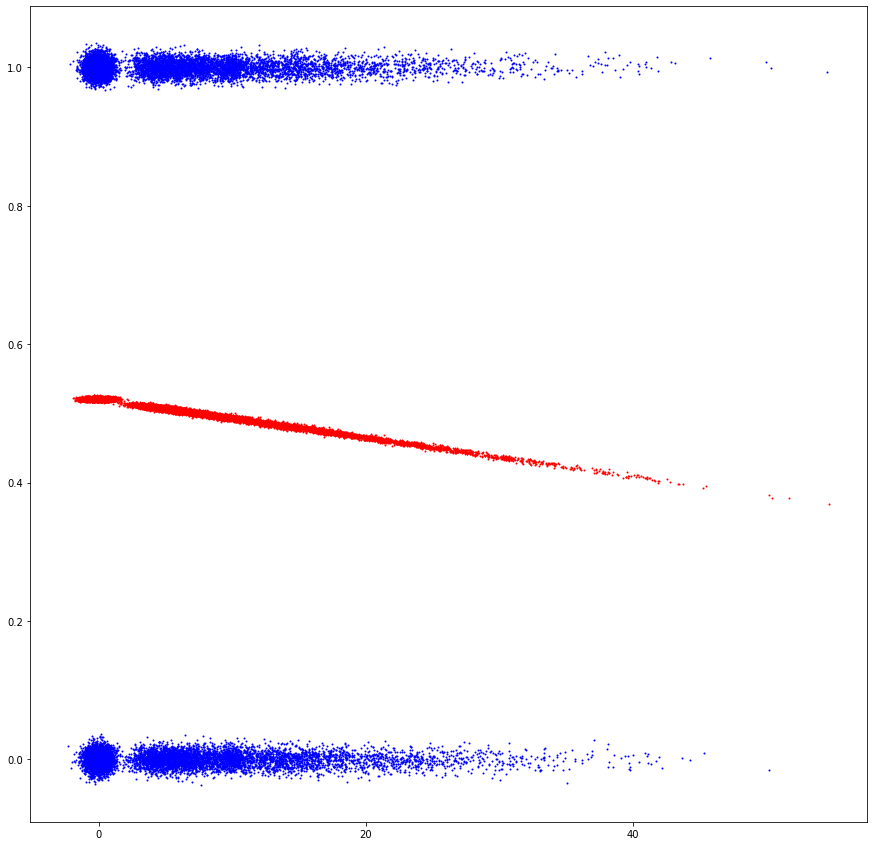

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**turns_taken**
-------
is_current_player_game_winner
CSV LINE:

0.5043029952,0,0,0,0,0,0,0,0,0,0,0,0,0.0000250569,0,0 


R^2:   4.920713714273717e-08 




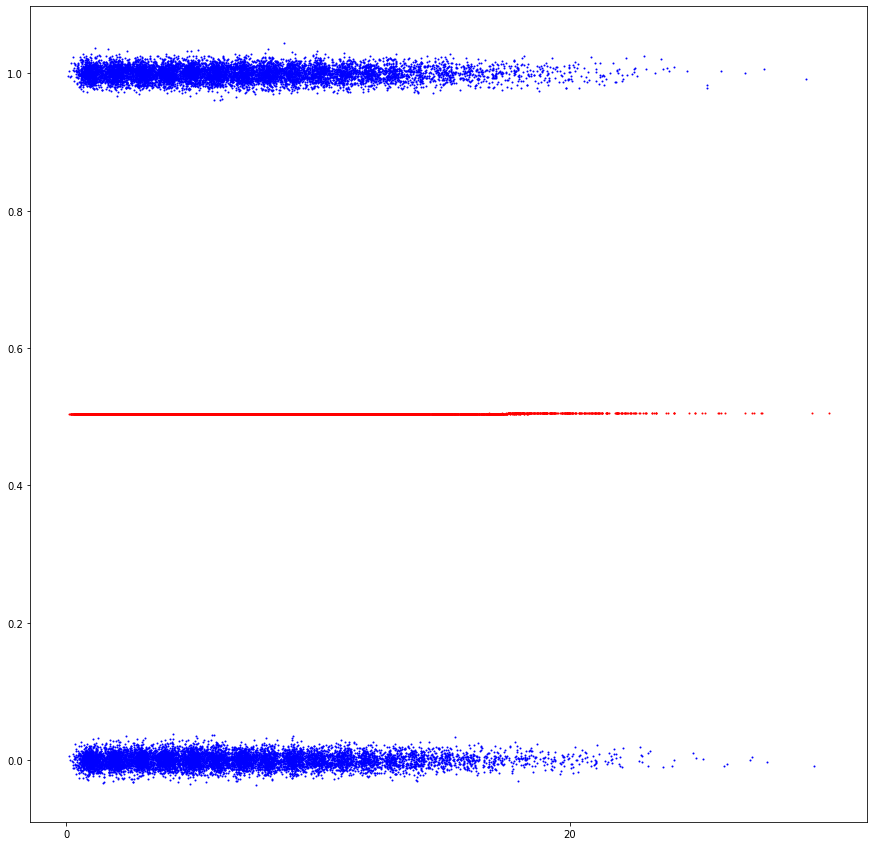

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**num_nearby_opponent_cards**
-------
is_current_player_game_winner
CSV LINE:

0.4015566338,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0017667352,0 


R^2:   2.425812560524765e-05 




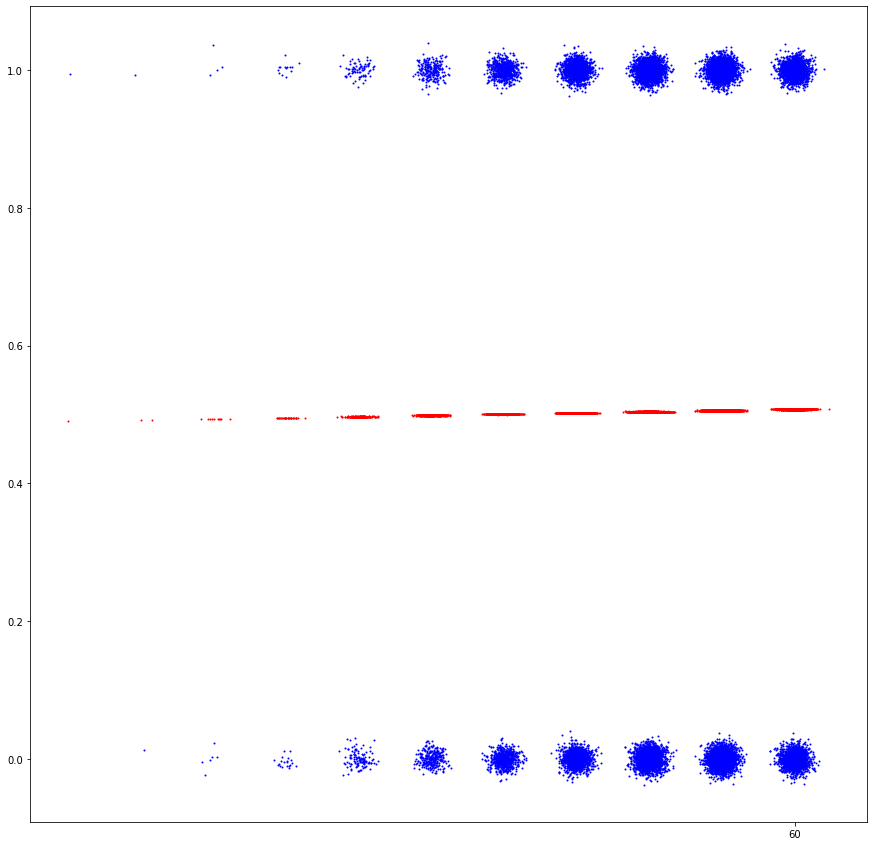

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
**discard_danger**
-------
is_current_player_game_winner
CSV LINE:

0.5113359162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.0183490234 


R^2:   0.00013701706659396962 




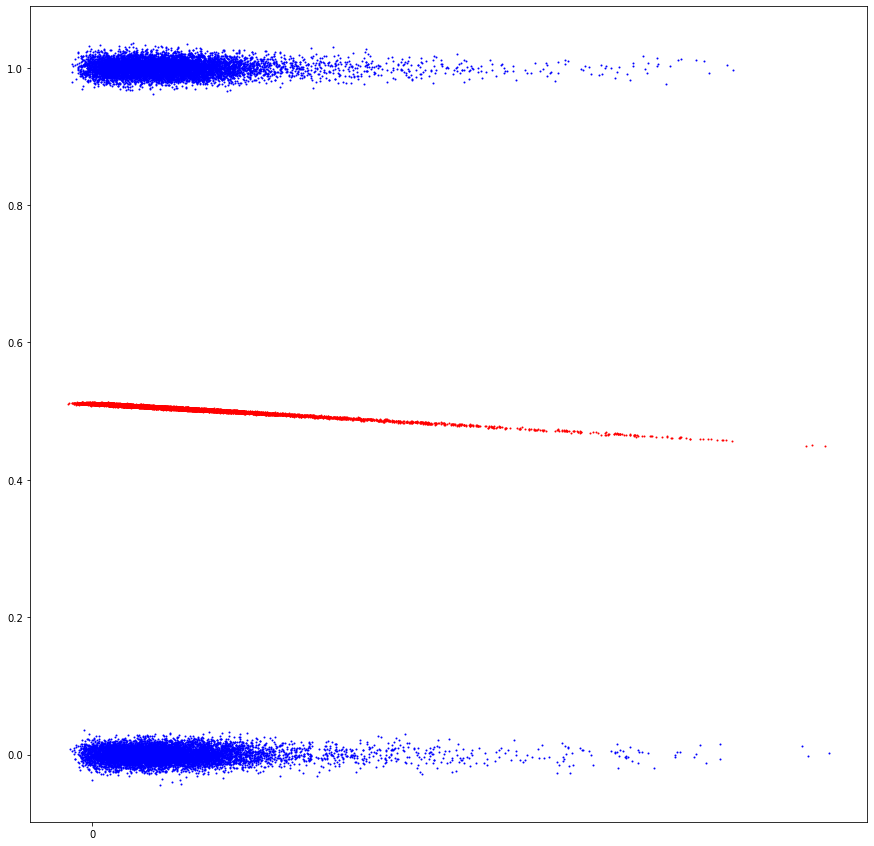

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [59]:
for feature in features:
    # features for regression input
    f = [feature]
    # feature for regression output
    g = "is_current_player_game_winner"

    # feature for dependent plot
    var = f[0]


    print("\n".join(f"**{el}**" if el == var else el for el in f))
    print("-------")
    print(g)
    
    X = df[f]
    y = df[[g]]

    linear_regressor = LinearRegression()
    linear_regressor.fit(X, y)

    print("CSV LINE:\n")
    line =  '{0:.10f}'.format(linear_regressor.intercept_[0])
    for i in range(len(features)):
        if features[i] in f:
            line += ',' + '{0:.10f}'.format(linear_regressor.coef_[0][f.index(features[i])])
        else:
            line += ",0"
    print(line, "\n\n")

    print("R^2:  ", linear_regressor.score(X, y), "\n\n")

    y_pred = linear_regressor.predict(X)

    def jitter(arr):
        stdev = 0.01 * (max(arr) - min(arr))
        return arr + np.random.randn(len(arr)) * stdev

    fig = plt.figure(figsize=(15,15))
    plt.xticks(range(0,200,20))
    plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
    plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
    plt.show()
    
    print("---" * 100)

# Quadratic

In [36]:
# copy df to df2
# choose any two (not necessarily distinct) columns of df, multiply them coordinate wise, and append this column to df2

current_player_score
opponent_score
current_player_deadwood
current_player_num_hit_cards
num_melds
point_sum_melds
num_combos
point_sum_combos
num_knock_cache
point_sum_knock_cache
num_load_cards
point_sum_load_cards
turns_taken
num_nearby_opponent_cards
discard_danger
current_player_score_$_current_player_score
current_player_score_$_opponent_score
current_player_score_$_current_player_deadwood
current_player_score_$_current_player_num_hit_cards
current_player_score_$_num_melds
current_player_score_$_point_sum_melds
current_player_score_$_num_combos
current_player_score_$_point_sum_combos
current_player_score_$_num_knock_cache
current_player_score_$_point_sum_knock_cache
current_player_score_$_num_load_cards
current_player_score_$_point_sum_load_cards
current_player_score_$_turns_taken
current_player_score_$_num_nearby_opponent_cards
current_player_score_$_discard_danger
opponent_score_$_opponent_score
opponent_score_$_current_player_deadwood
opponent_score_$_current_player_num_hit_ca

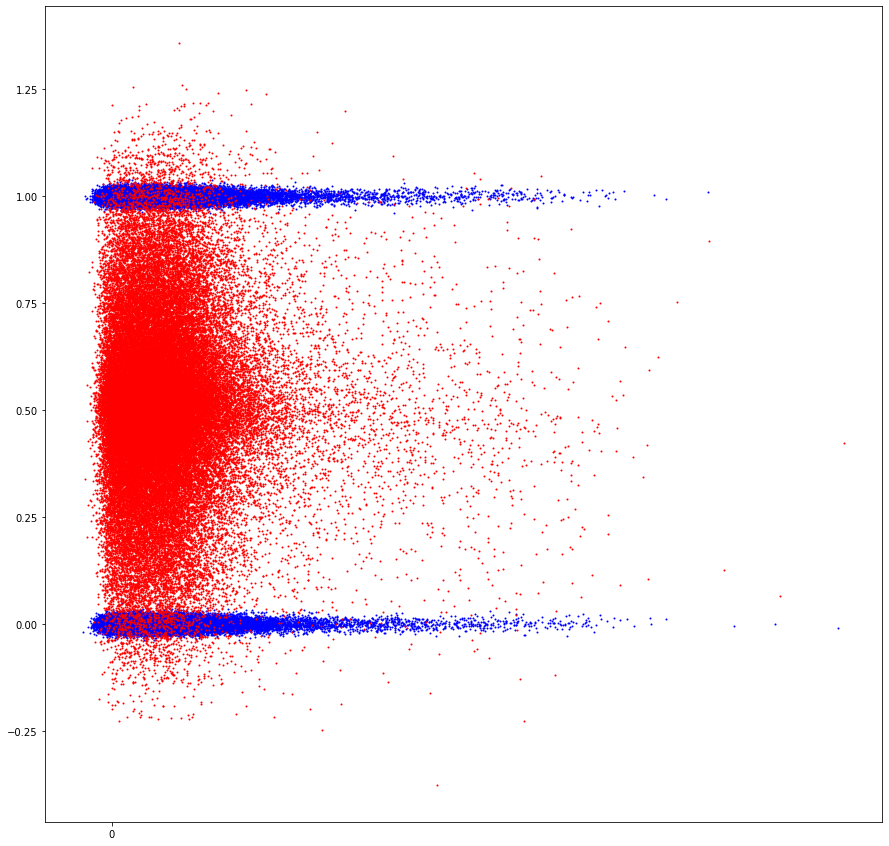

In [20]:
df2 = df.copy()

quadratic_f = f.copy()
quadratic_features = features.copy()

for i in range(len(features)):
    for j in range(i, len(features)):
        new_feature = features[i] + "_$_" + features[j]
        df2[new_feature] = df[features[i]] *  df[features[j]]
        quadratic_features += [new_feature]
        if features[i] in f and features[j] in f:
            quadratic_f += [new_feature]

print("\n".join(quadratic_f), "\n\n")            

X = df2[quadratic_f]
y = df2[[g]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
line =  '{0:.10f}'.format(linear_regressor.intercept_[0])
for i in range(len(quadratic_features)):
    if quadratic_features[i] in quadratic_f:
        line += ',' + '{0:.10f}'.format(linear_regressor.coef_[0][quadratic_f.index(quadratic_features[i])])
    else:
        line += ",0"
print(line, "\n\n")



print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)

# fig = plt.figure(figsize=(15,15))
# plt.scatter(X[[var]], y[[g]], s=1, color='blue')
# plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
# plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()


In [69]:
df2 = df.copy()

quadratic_features = features.copy()

for i in range(len(features)):
    for j in range(i, len(features)):
        new_feature = features[i] + "_$_" + features[j]
        df2[new_feature] = df[features[i]] *  df[features[j]]
        quadratic_features += [new_feature]
        quadratic_f += [new_feature]

print("\n".join(quadratic_features), "\n\n") 


current_player_score
opponent_score
current_player_deadwood
current_player_num_hit_cards
num_melds
point_sum_melds
num_combos
point_sum_combos
num_knock_cache
point_sum_knock_cache
num_load_cards
point_sum_load_cards
turns_taken
num_nearby_opponent_cards
discard_danger
current_player_score_$_current_player_score
current_player_score_$_opponent_score
current_player_score_$_current_player_deadwood
current_player_score_$_current_player_num_hit_cards
current_player_score_$_num_melds
current_player_score_$_point_sum_melds
current_player_score_$_num_combos
current_player_score_$_point_sum_combos
current_player_score_$_num_knock_cache
current_player_score_$_point_sum_knock_cache
current_player_score_$_num_load_cards
current_player_score_$_point_sum_load_cards
current_player_score_$_turns_taken
current_player_score_$_num_nearby_opponent_cards
current_player_score_$_discard_danger
opponent_score_$_opponent_score
opponent_score_$_current_player_deadwood
opponent_score_$_current_player_num_hit_ca

current_player_score 

R^2:   0.04963625104654312 




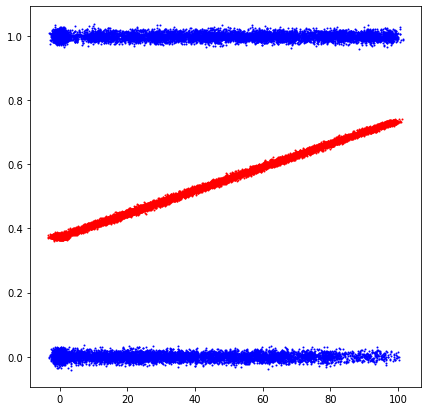

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score 

R^2:   0.048938824739620745 




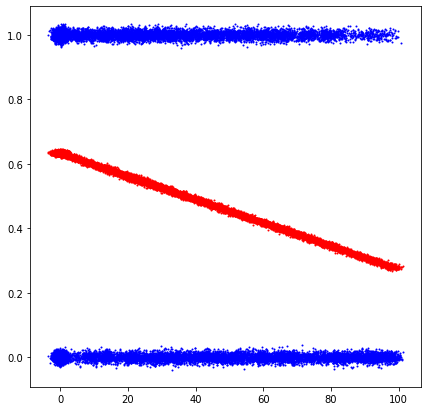

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood 

R^2:   0.004887104137448528 




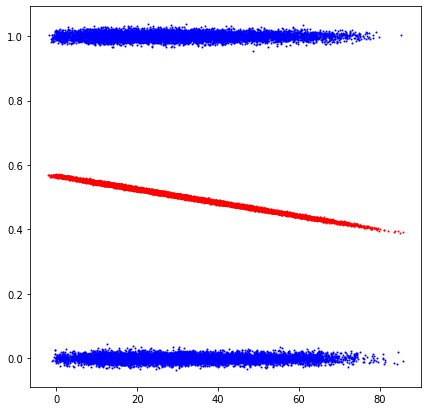

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards 

R^2:   0.0019061662539296975 




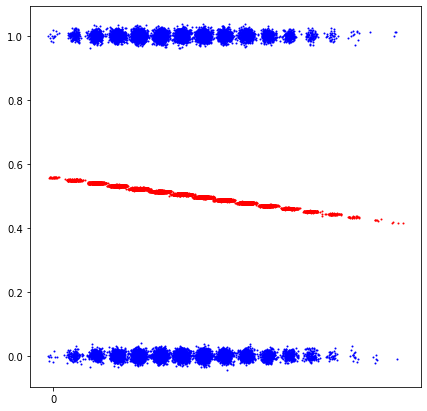

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds 

R^2:   0.005648652155859635 




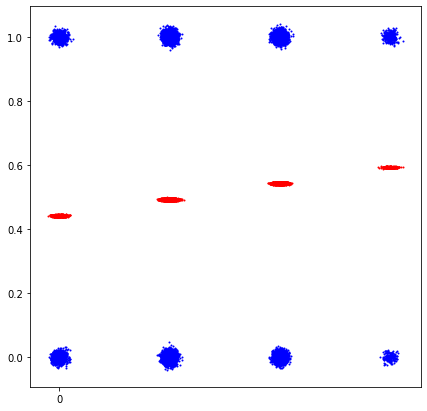

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds 

R^2:   0.003744425713122057 




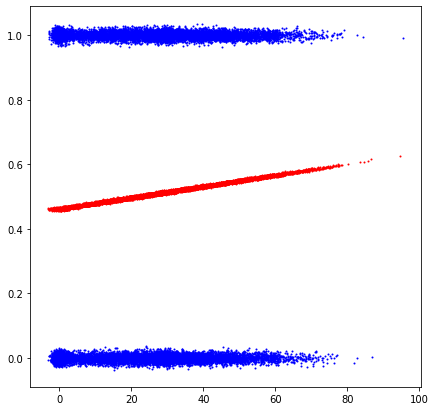

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_combos 

R^2:   0.003117553091006031 




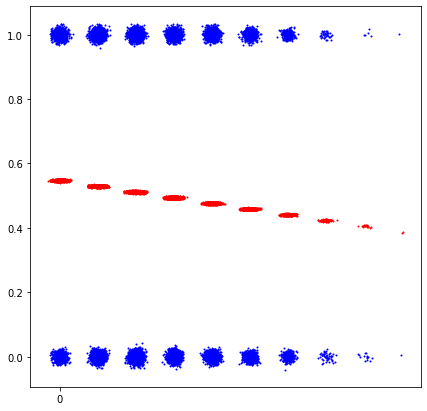

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_combos 

R^2:   0.0029945818081016373 




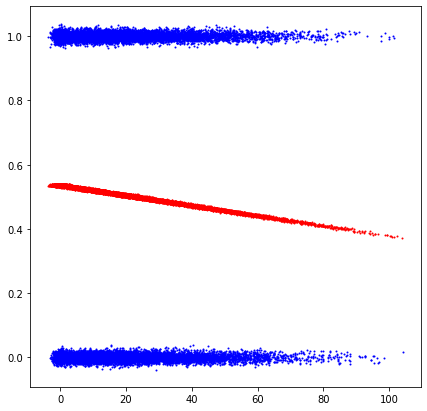

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_knock_cache 

R^2:   0.0015021732146316413 




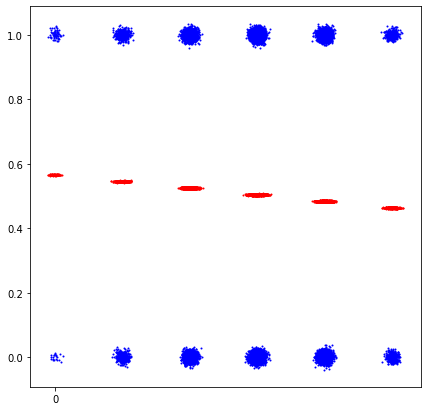

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_knock_cache 

R^2:   0.000812175875238963 




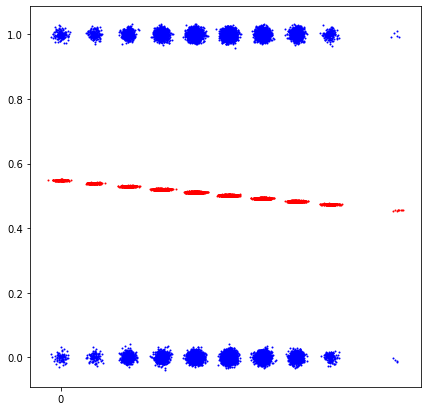

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_load_cards 

R^2:   0.0016396145261815542 




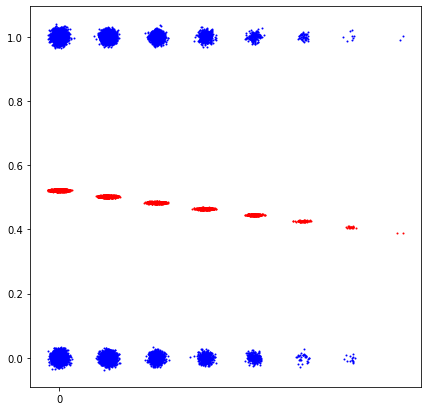

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_load_cards 

R^2:   0.0017068051167825615 




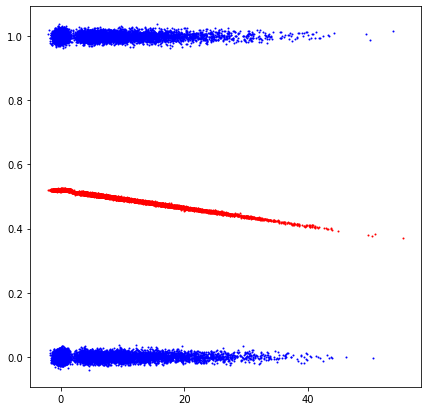

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
turns_taken 

R^2:   4.920713714273717e-08 




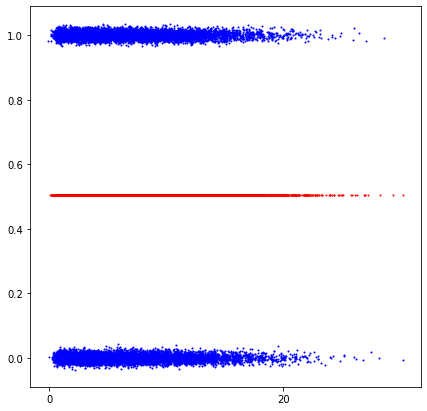

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_nearby_opponent_cards 

R^2:   2.425812560524765e-05 




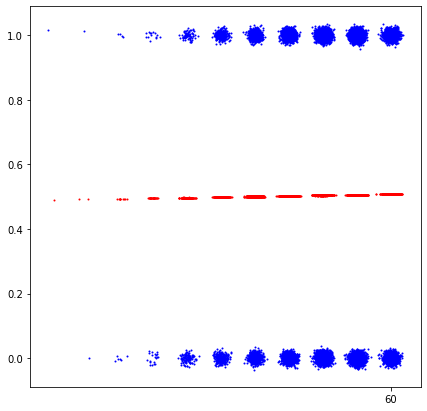

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
discard_danger 

R^2:   0.00013701706659396962 




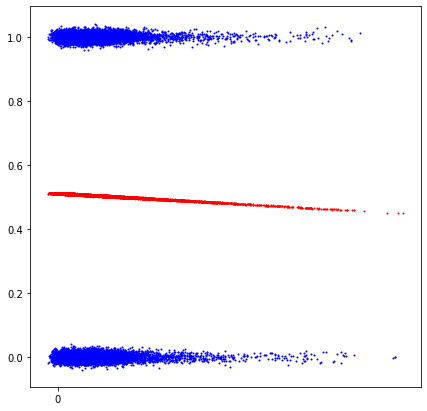

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_current_player_score 

R^2:   0.056601751388835275 




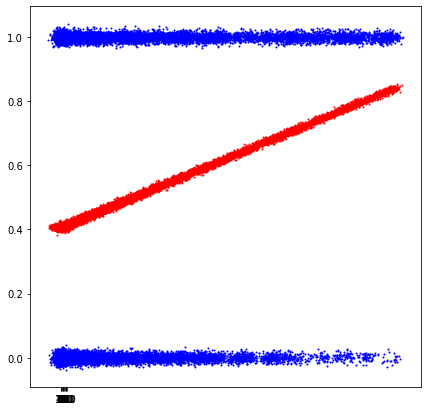

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_opponent_score 

R^2:   6.872097151555678e-06 




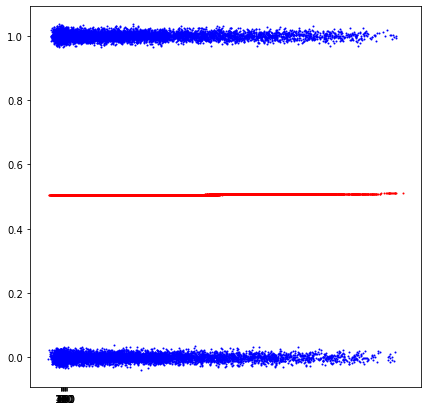

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_current_player_deadwood 

R^2:   0.01690204843481391 




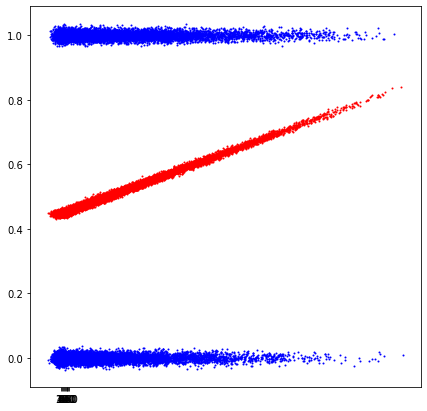

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_current_player_num_hit_cards 

R^2:   0.02811195211719686 




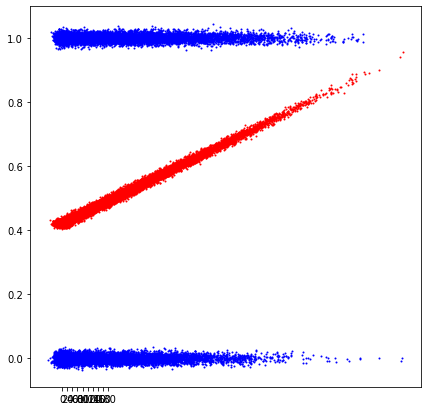

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_num_melds 

R^2:   0.04172211237764123 




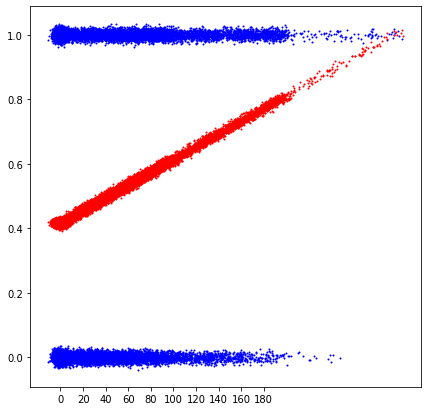

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_point_sum_melds 

R^2:   0.03338472129450276 




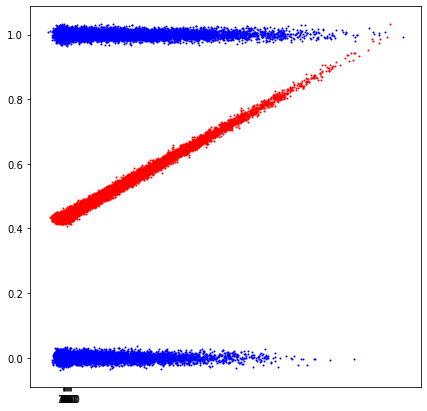

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_num_combos 

R^2:   0.015675172821926542 




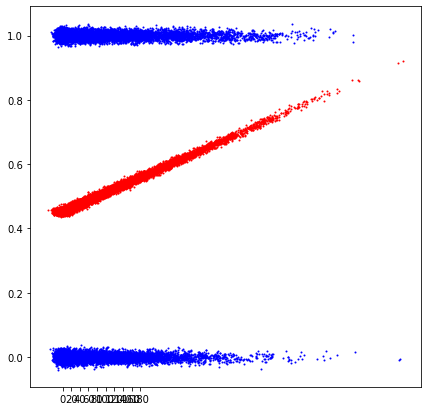

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_point_sum_combos 

R^2:   0.0092847217731451 




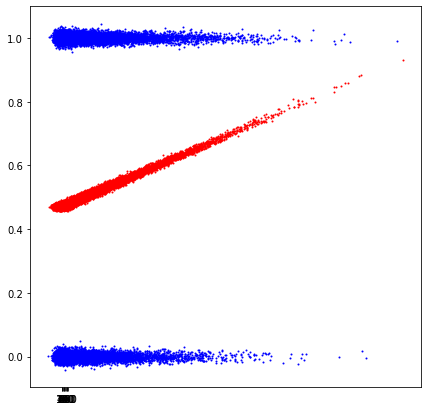

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_num_knock_cache 

R^2:   0.03741875021231089 




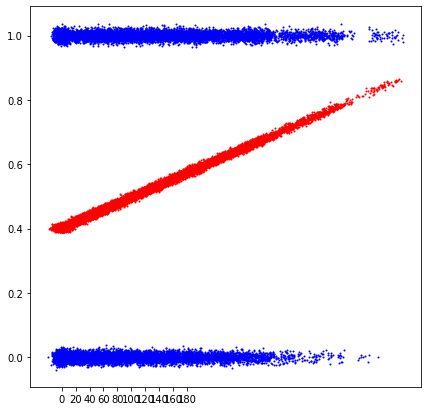

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_point_sum_knock_cache 

R^2:   0.03602986149688503 




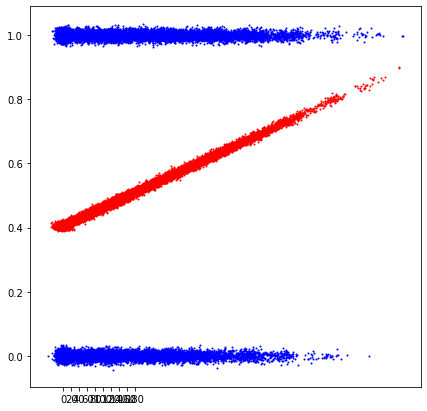

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_num_load_cards 

R^2:   0.005185637023341405 




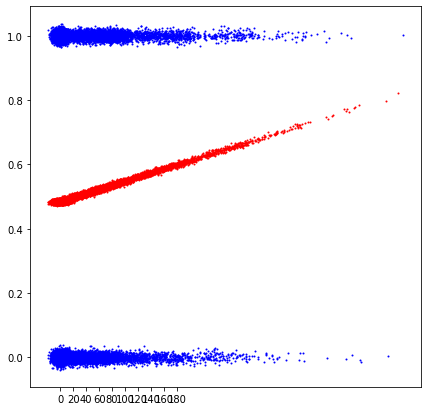

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_point_sum_load_cards 

R^2:   0.004554004758703822 




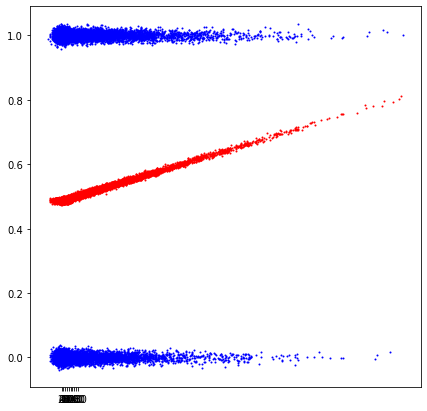

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_turns_taken 

R^2:   0.026050562200346628 




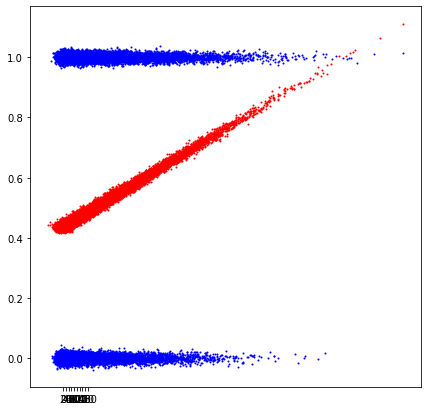

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_num_nearby_opponent_cards 

R^2:   0.04943957460169279 




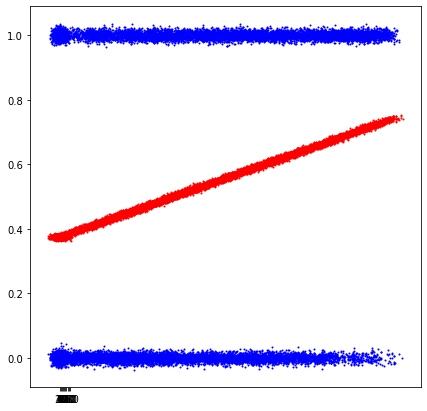

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_score_$_discard_danger 

R^2:   0.016052633103838643 




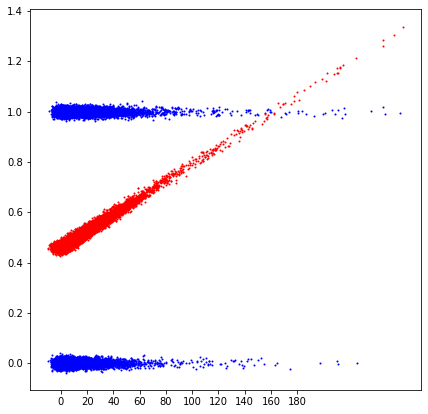

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_opponent_score 

R^2:   0.055692638843368614 




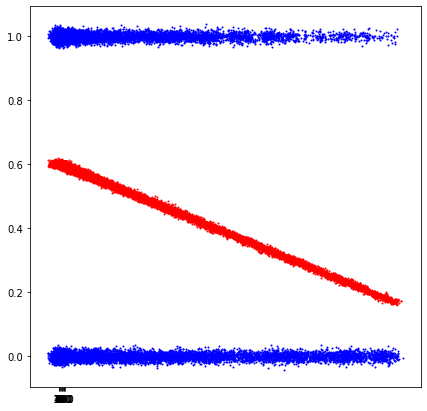

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_current_player_deadwood 

R^2:   0.04205634784428214 




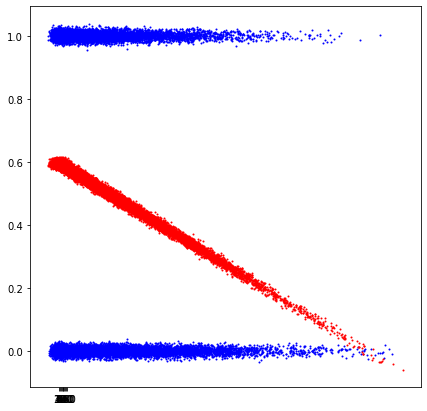

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_current_player_num_hit_cards 

R^2:   0.04283135008262118 




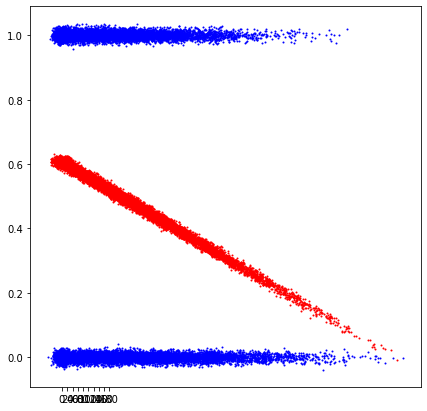

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_num_melds 

R^2:   0.014689649249968628 




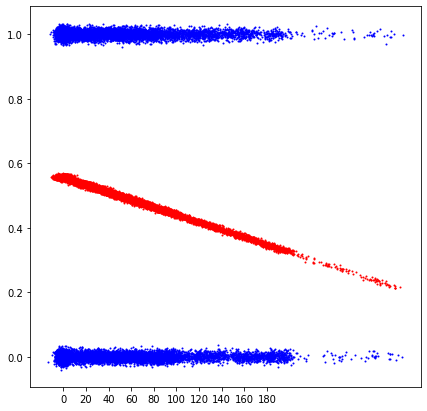

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_point_sum_melds 

R^2:   0.012830782345682579 




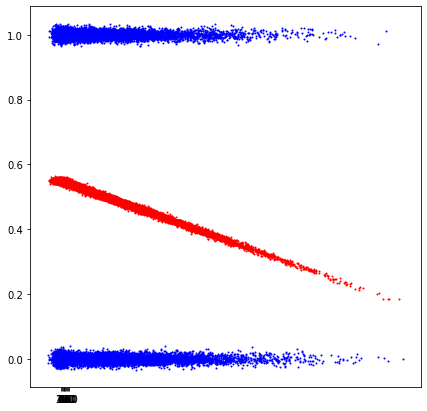

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_num_combos 

R^2:   0.03623016225130882 




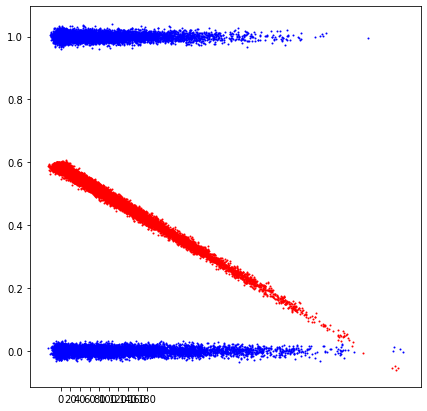

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_point_sum_combos 

R^2:   0.027931225229787415 




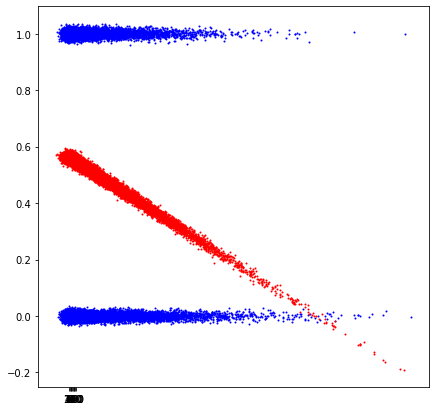

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_num_knock_cache 

R^2:   0.04488865756297866 




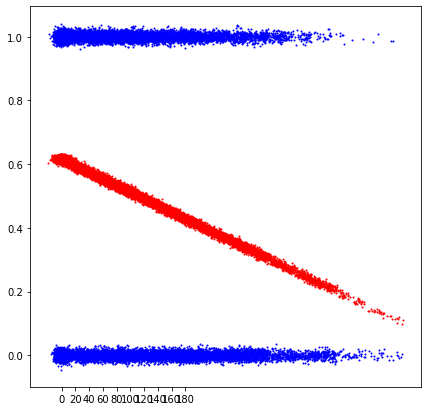

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_point_sum_knock_cache 

R^2:   0.04556741018343091 




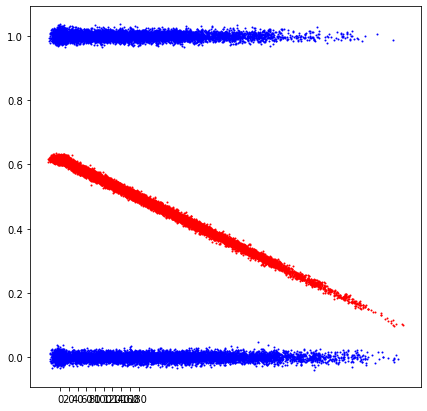

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_num_load_cards 

R^2:   0.02049227399498932 




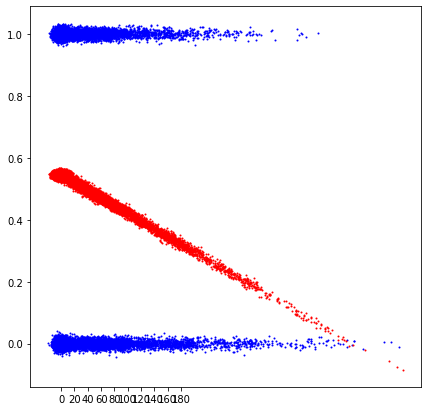

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_point_sum_load_cards 

R^2:   0.017892929753182685 




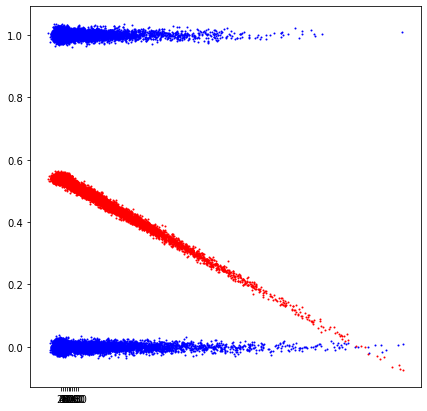

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_turns_taken 

R^2:   0.0246395964566426 




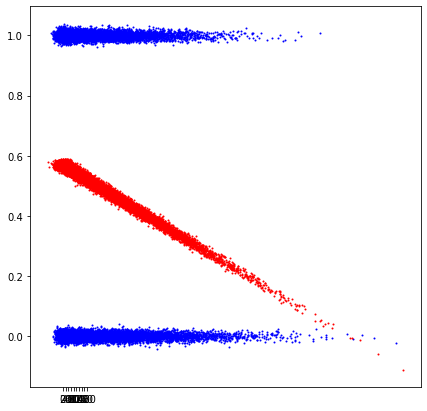

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_num_nearby_opponent_cards 

R^2:   0.04884119610164106 




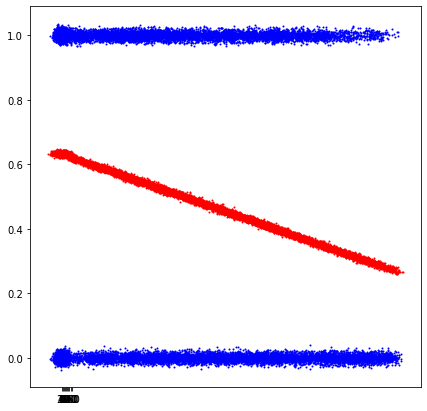

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opponent_score_$_discard_danger 

R^2:   0.020149424268432692 




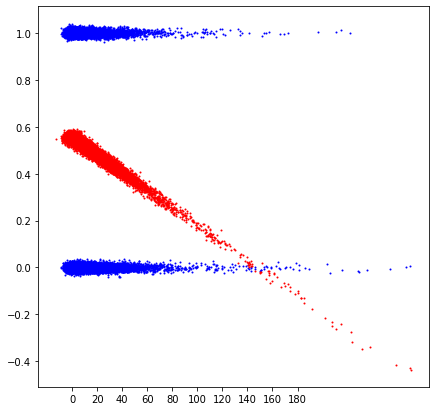

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_current_player_deadwood 

R^2:   0.0035689840136132744 




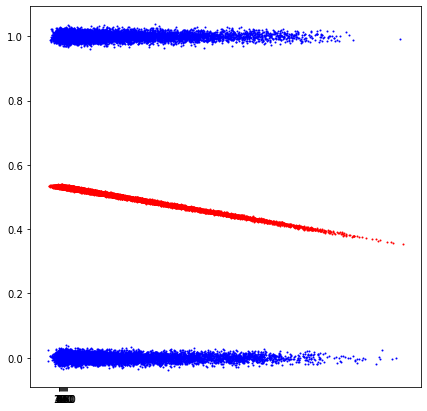

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_current_player_num_hit_cards 

R^2:   0.003478502285921614 




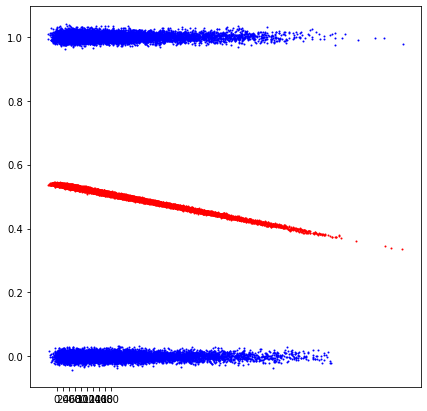

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_num_melds 

R^2:   2.916076078718355e-06 




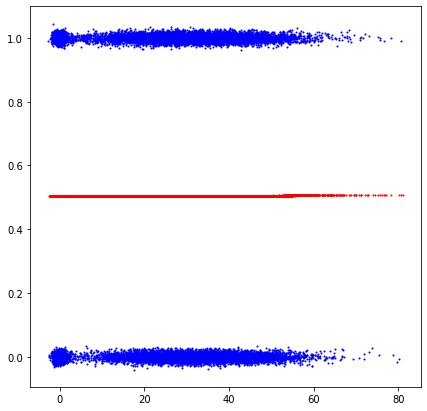

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_point_sum_melds 

R^2:   2.535957860483329e-06 




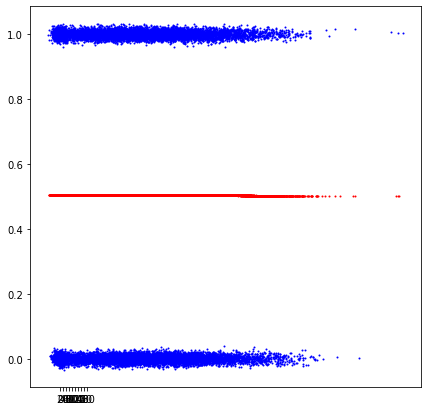

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_num_combos 

R^2:   0.0033603374931839847 




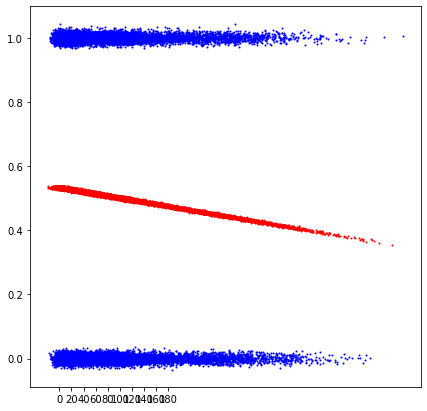

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_point_sum_combos 

R^2:   0.0024544076837097473 




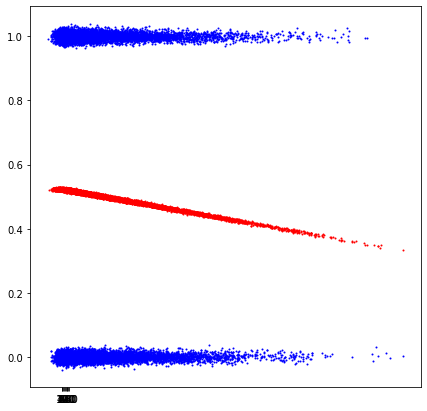

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_num_knock_cache 

R^2:   0.004465240408559001 




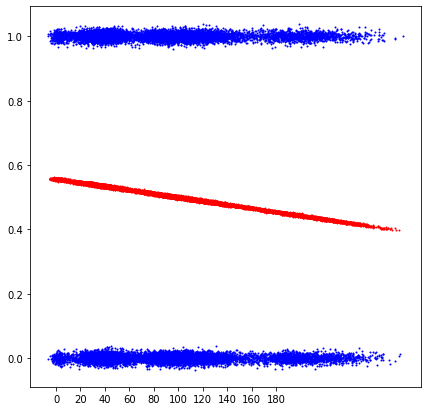

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_point_sum_knock_cache 

R^2:   0.0041650247065212476 




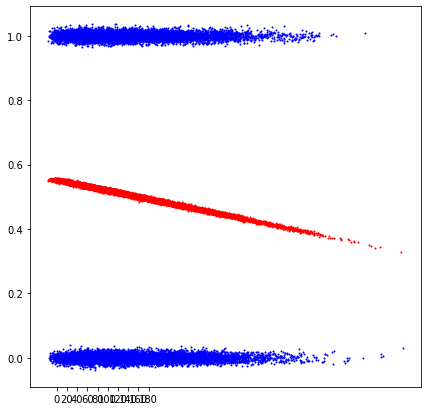

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_num_load_cards 

R^2:   0.0021269759024448165 




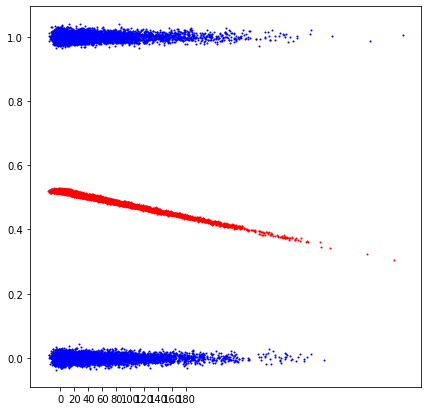

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_point_sum_load_cards 

R^2:   0.0021297451697056546 




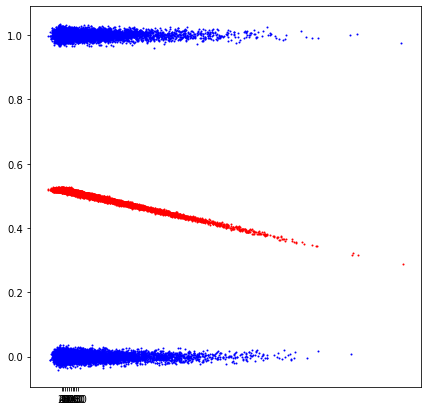

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_turns_taken 

R^2:   0.0037823325018814247 




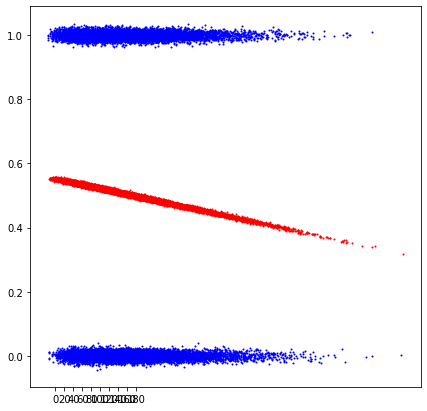

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_num_nearby_opponent_cards 

R^2:   0.004855986131574452 




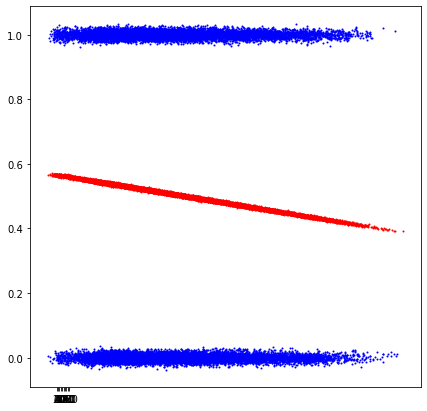

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_deadwood_$_discard_danger 

R^2:   0.002919370717235692 




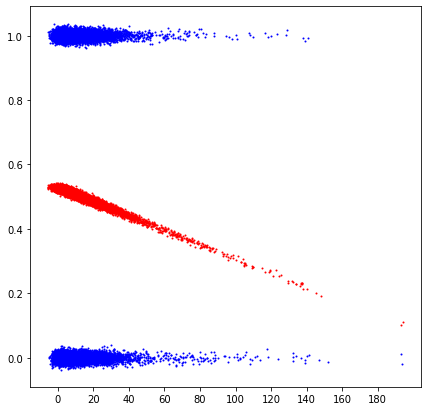

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_current_player_num_hit_cards 

R^2:   0.001920275377241376 




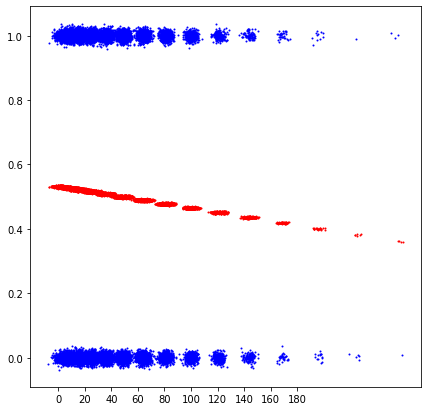

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_num_melds 

R^2:   0.0016382182966474534 




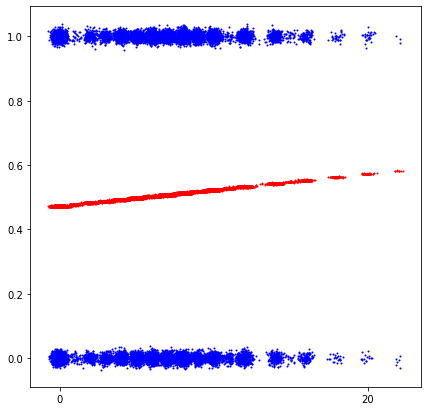

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_point_sum_melds 

R^2:   0.001216244409873224 




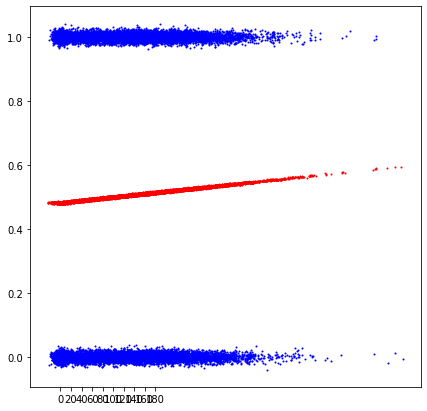

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_num_combos 

R^2:   0.0023889187631278563 




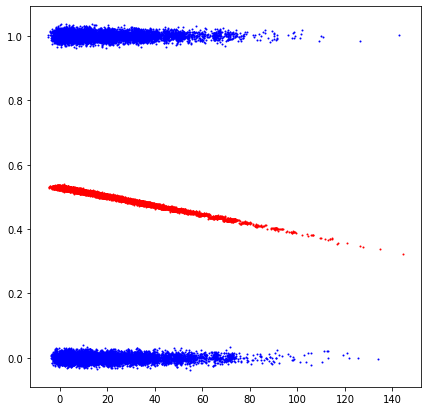

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_point_sum_combos 

R^2:   0.002484309441682986 




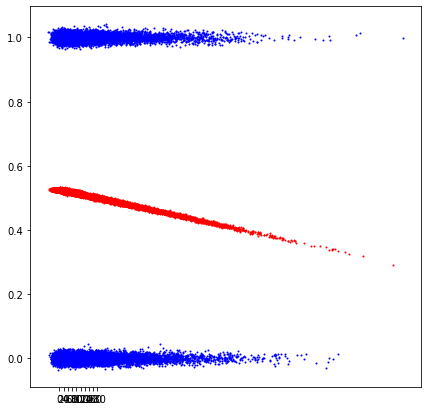

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_num_knock_cache 

R^2:   0.0018765127621430677 




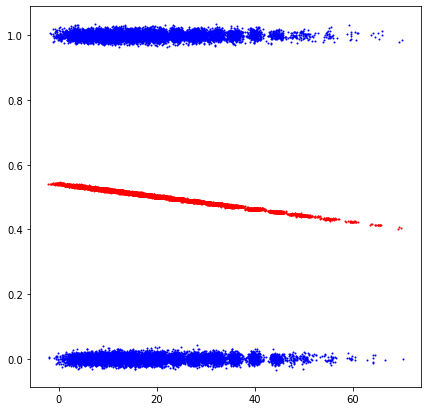

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_point_sum_knock_cache 

R^2:   0.002304943757362121 




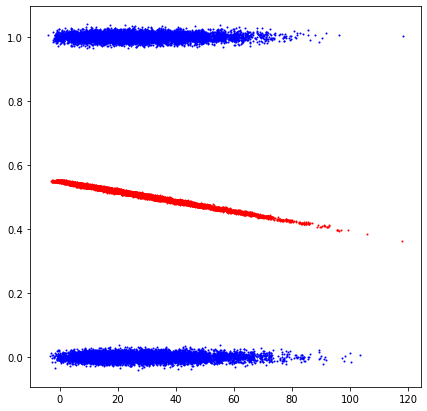

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_num_load_cards 

R^2:   0.0019009231857256559 




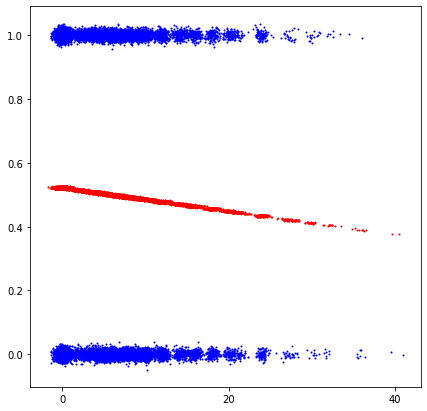

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_point_sum_load_cards 

R^2:   0.0019657902770083835 




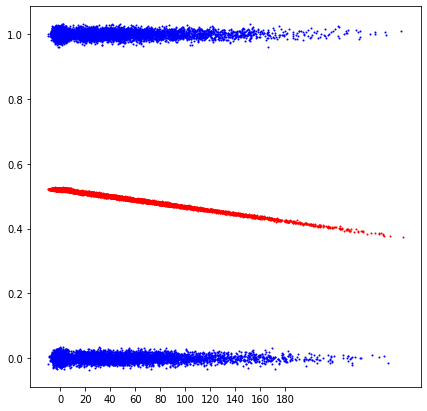

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_turns_taken 

R^2:   0.0006052563647868103 




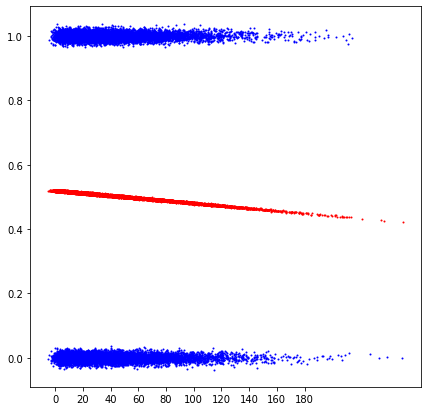

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_num_nearby_opponent_cards 

R^2:   0.0018908383503853932 




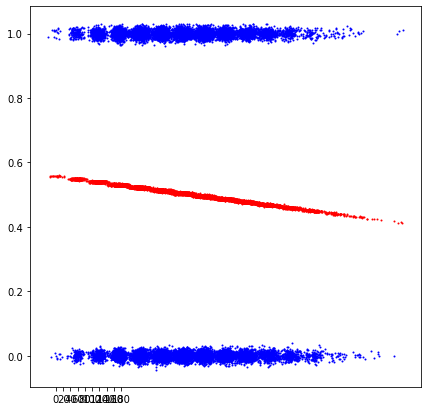

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
current_player_num_hit_cards_$_discard_danger 

R^2:   0.0008695213798900481 




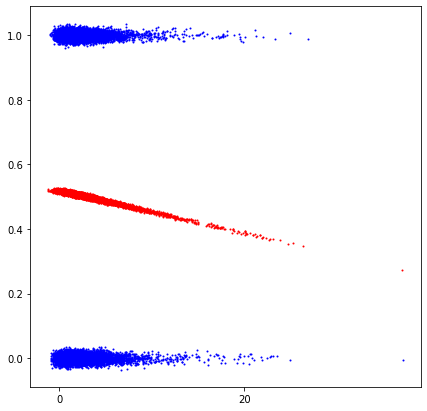

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_num_melds 

R^2:   0.006431506474367299 




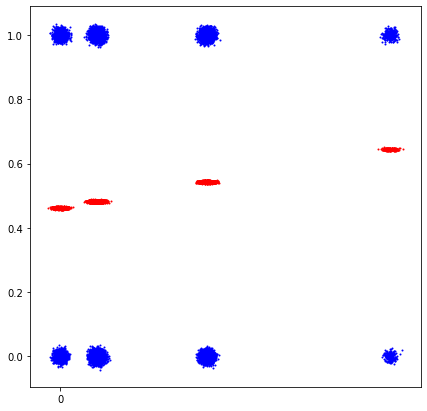

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_point_sum_melds 

R^2:   0.006043214410752729 




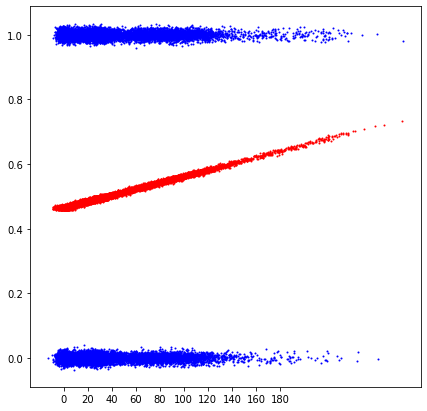

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_num_combos 

R^2:   1.8552734792898207e-08 




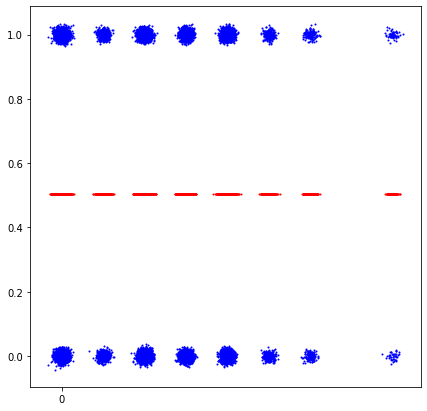

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_point_sum_combos 

R^2:   8.363451701876023e-05 




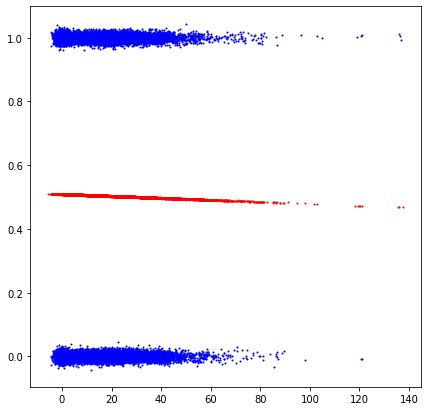

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_num_knock_cache 

R^2:   0.0018431803272112024 




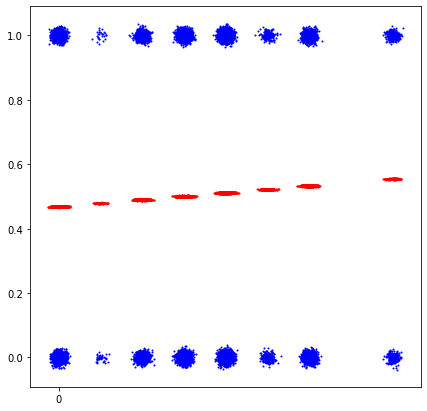

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_point_sum_knock_cache 

R^2:   0.0019701377055958424 




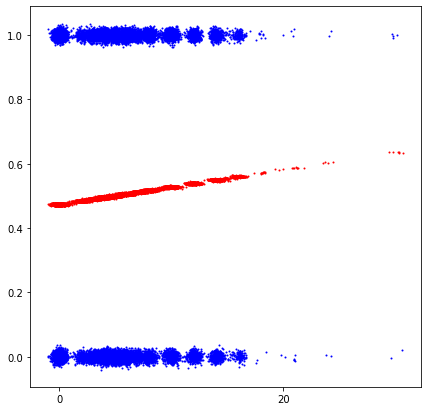

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_num_load_cards 

R^2:   0.00011657906774453775 




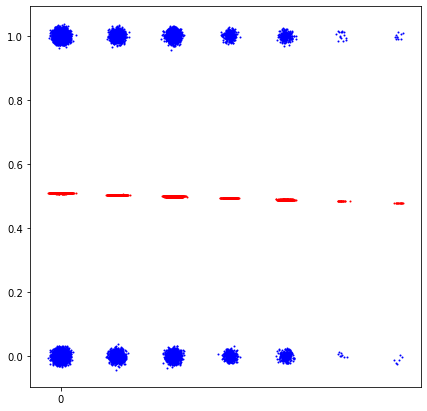

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_point_sum_load_cards 

R^2:   0.00013814003828671595 




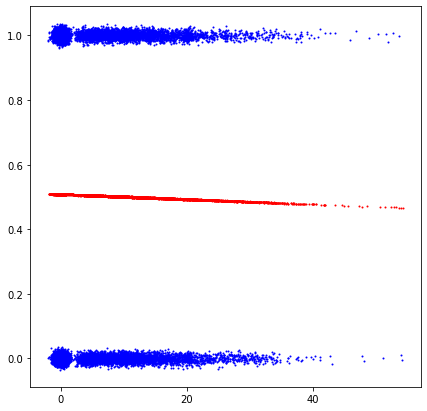

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_turns_taken 

R^2:   0.0011902614159585712 




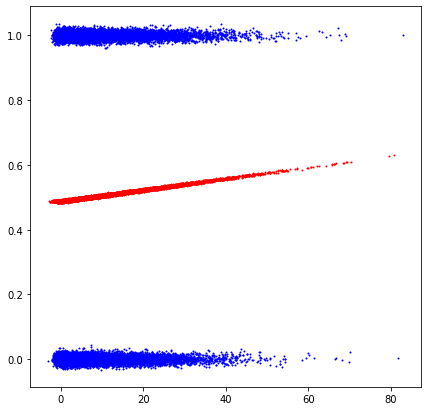

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_num_nearby_opponent_cards 

R^2:   0.005730176313858193 




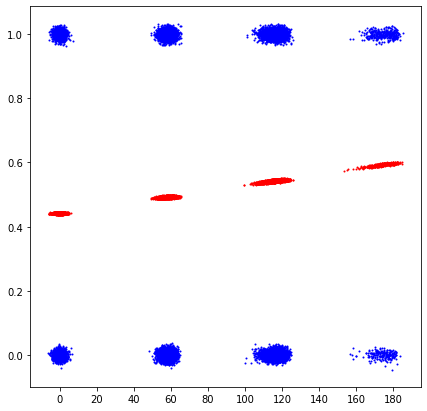

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_melds_$_discard_danger 

R^2:   0.001232721267525605 




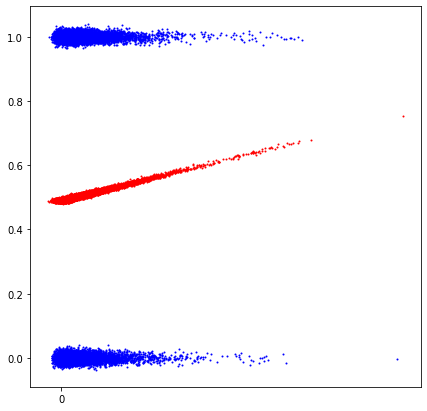

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds_$_point_sum_melds 

R^2:   0.003817614697020133 




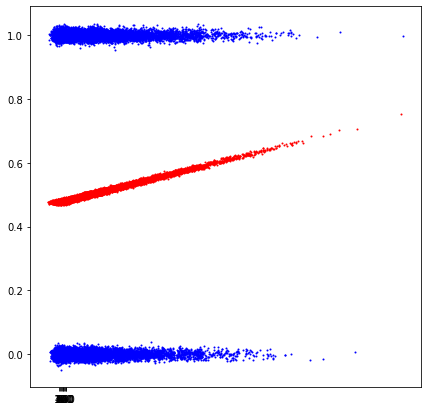

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds_$_num_combos 

R^2:   3.425214366581386e-07 




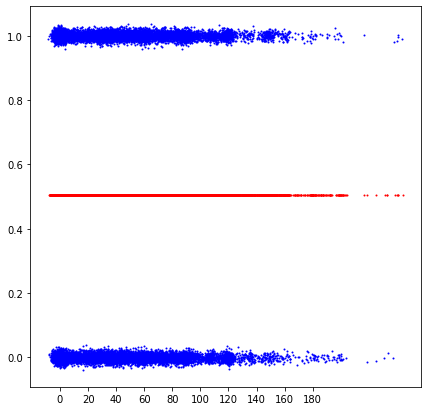

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds_$_point_sum_combos 

R^2:   3.231882986176604e-05 




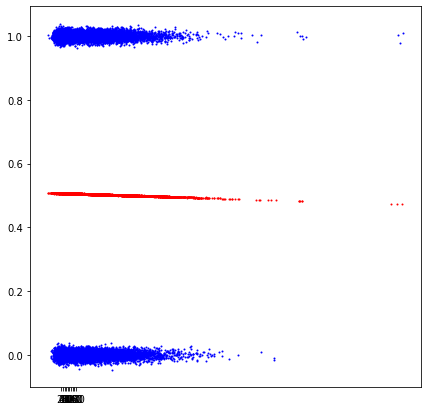

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds_$_num_knock_cache 

R^2:   0.0010678112573163645 




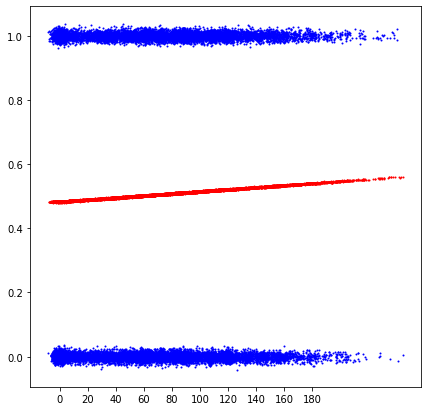

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds_$_point_sum_knock_cache 

R^2:   0.0014020949917742387 




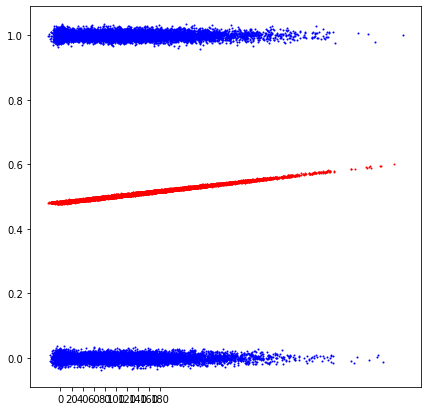

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds_$_num_load_cards 

R^2:   0.00026394697928799893 




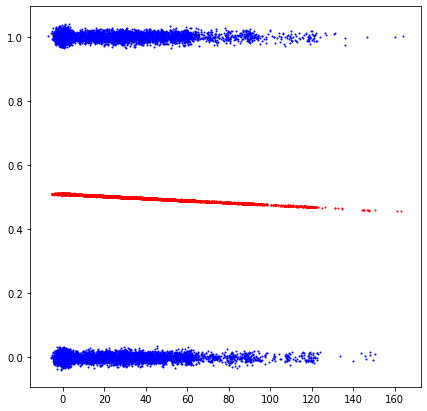

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds_$_point_sum_load_cards 

R^2:   0.00028604365872342274 




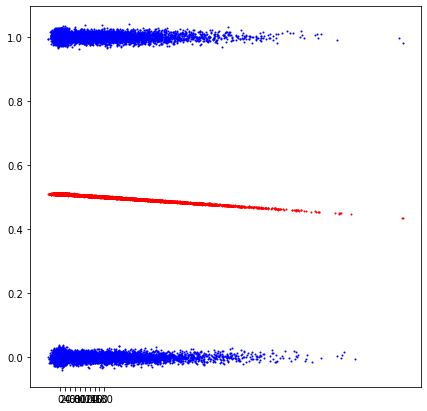

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds_$_turns_taken 

R^2:   0.000995370926944017 




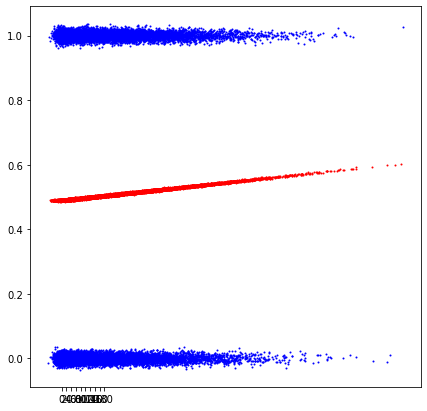

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds_$_num_nearby_opponent_cards 

R^2:   0.0038525133752811414 




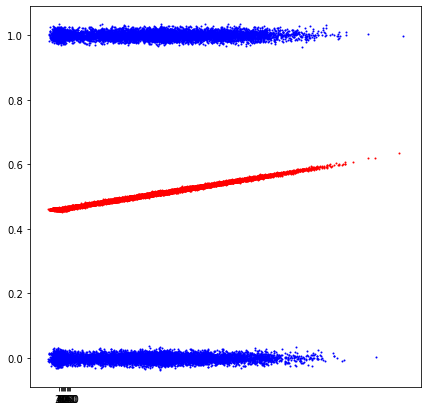

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_melds_$_discard_danger 

R^2:   0.0009965044716188087 




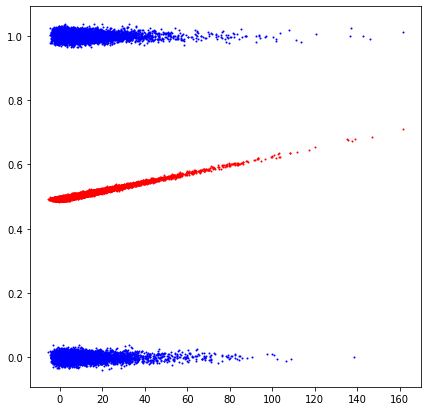

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_combos_$_num_combos 

R^2:   0.0023220577179127178 




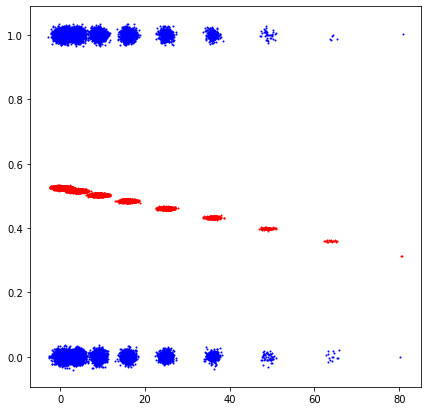

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_combos_$_point_sum_combos 

R^2:   0.0024824092959502275 




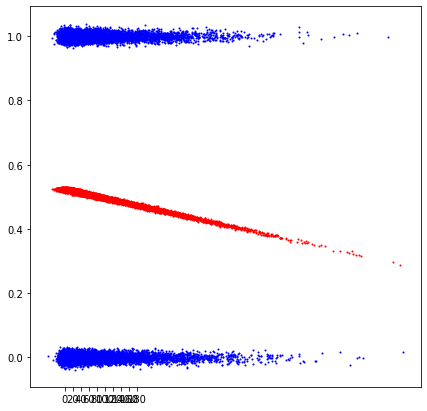

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_combos_$_num_knock_cache 

R^2:   0.002212455273547409 




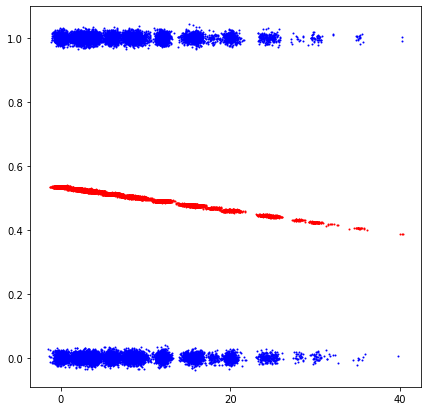

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_combos_$_point_sum_knock_cache 

R^2:   0.003308699830427919 




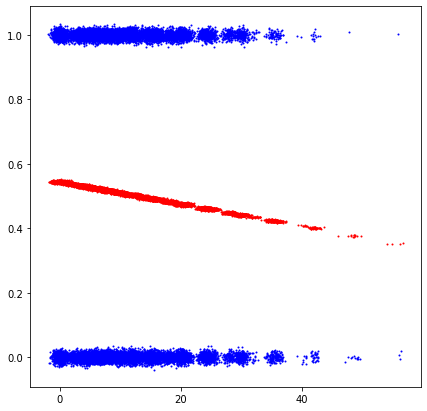

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_combos_$_num_load_cards 

R^2:   0.001919633708367896 




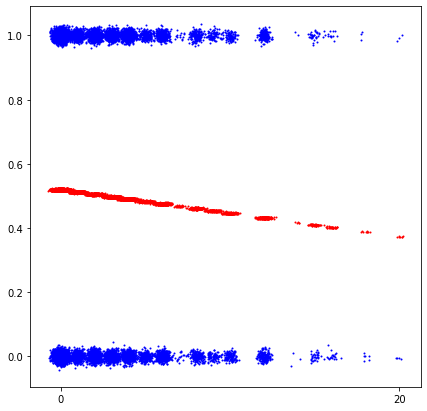

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_combos_$_point_sum_load_cards 

R^2:   0.0020785220352402822 




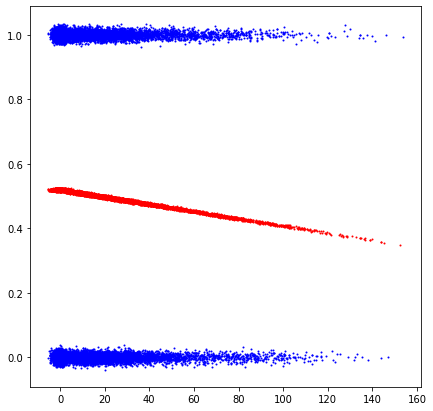

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_combos_$_turns_taken 

R^2:   0.0013653778072306721 




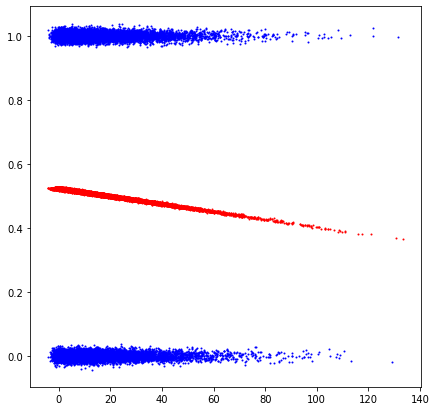

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_combos_$_num_nearby_opponent_cards 

R^2:   0.003123319930185442 




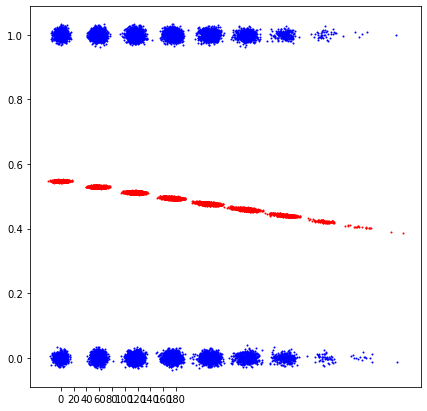

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_combos_$_discard_danger 

R^2:   0.001600427838614804 




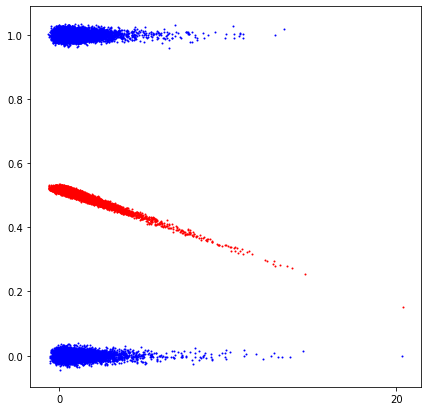

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_combos_$_point_sum_combos 

R^2:   0.0017070849334033245 




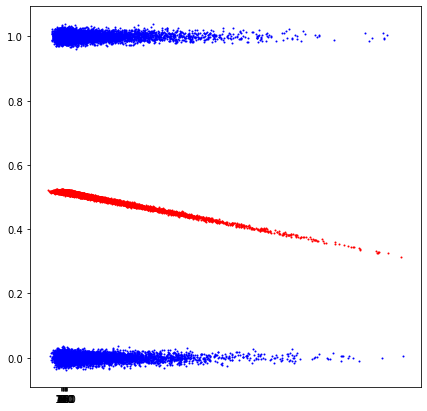

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_combos_$_num_knock_cache 

R^2:   0.003209803183153892 




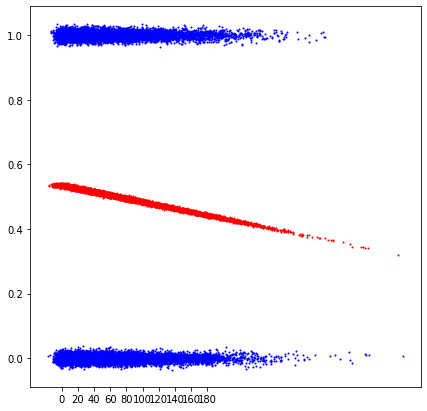

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_combos_$_point_sum_knock_cache 

R^2:   0.002778100400120498 




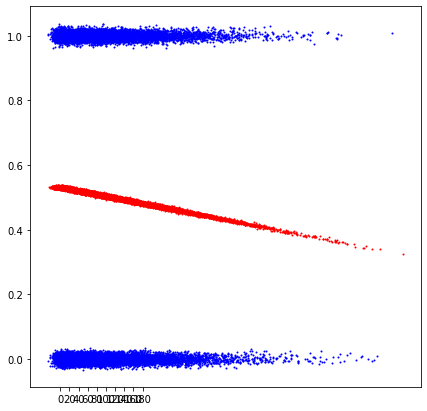

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_combos_$_num_load_cards 

R^2:   0.0021825276726743503 




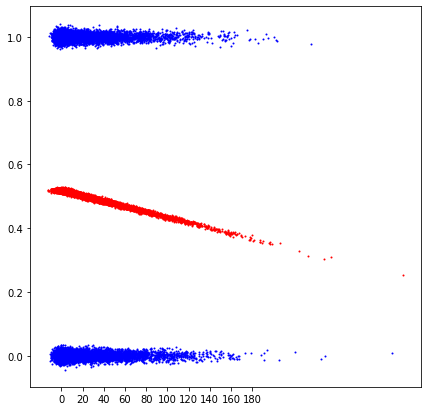

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_combos_$_point_sum_load_cards 

R^2:   0.0023901663523741012 




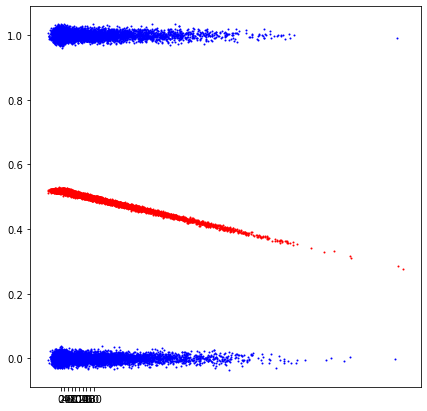

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_combos_$_turns_taken 

R^2:   0.002981963284442002 




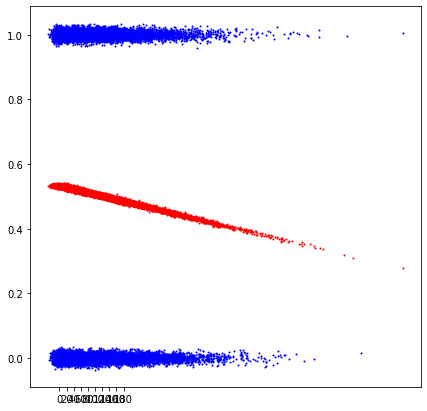

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_combos_$_num_nearby_opponent_cards 

R^2:   0.0030112127510262265 




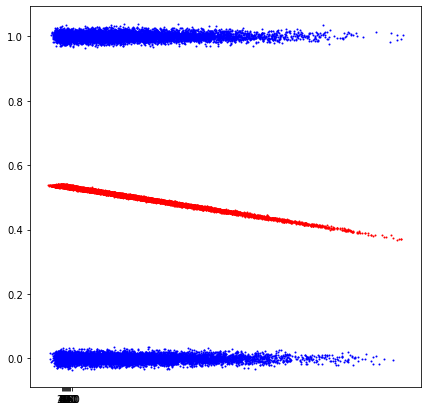

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_combos_$_discard_danger 

R^2:   0.00225468936237172 




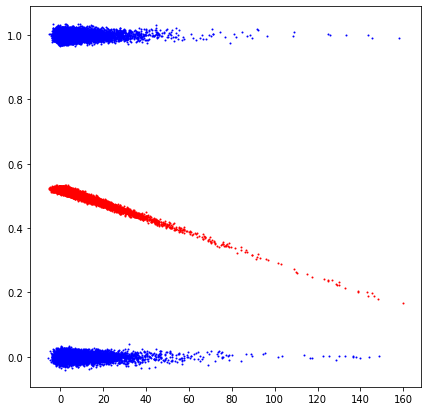

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_knock_cache_$_num_knock_cache 

R^2:   0.0010128074797695064 




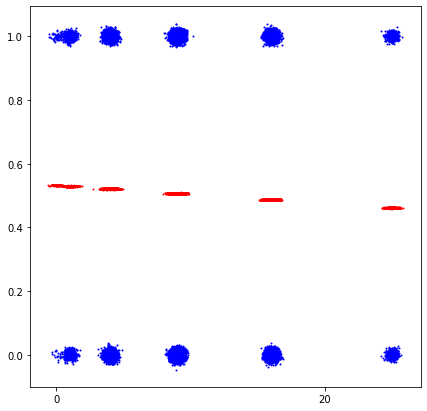

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_knock_cache_$_point_sum_knock_cache 

R^2:   0.0018381520272469087 




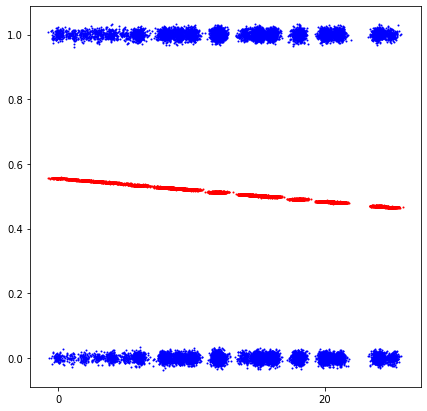

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_knock_cache_$_num_load_cards 

R^2:   0.0014064018739520234 




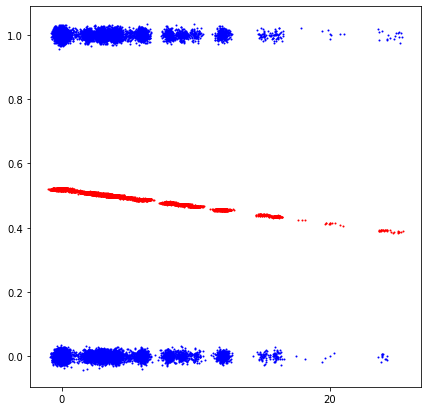

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_knock_cache_$_point_sum_load_cards 

R^2:   0.0015169891349381404 




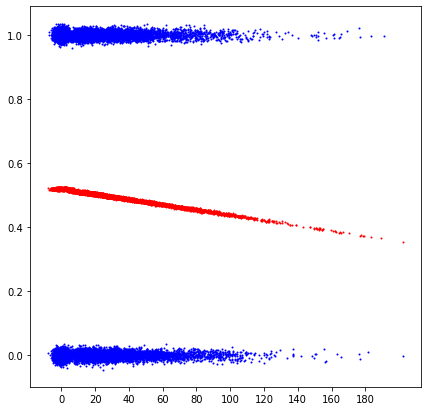

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_knock_cache_$_turns_taken 

R^2:   0.0004205101369090247 




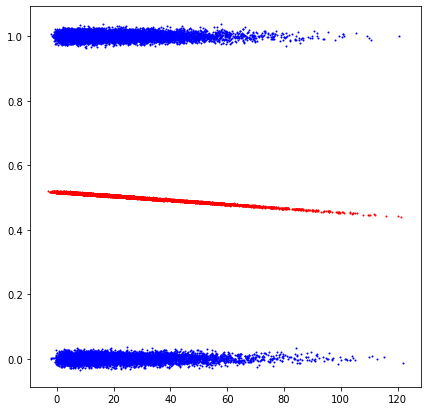

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_knock_cache_$_num_nearby_opponent_cards 

R^2:   0.001502999374983549 




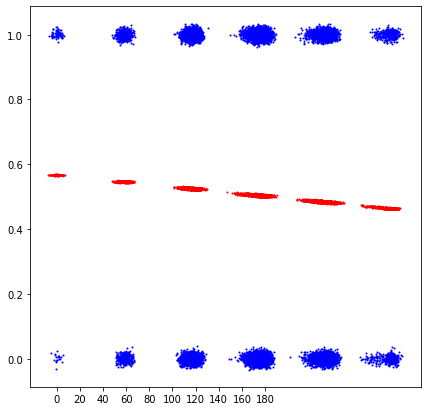

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_knock_cache_$_discard_danger 

R^2:   0.0004802472236064004 




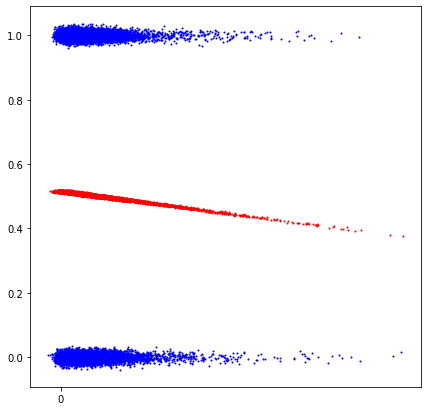

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_knock_cache_$_point_sum_knock_cache 

R^2:   0.000333750546540168 




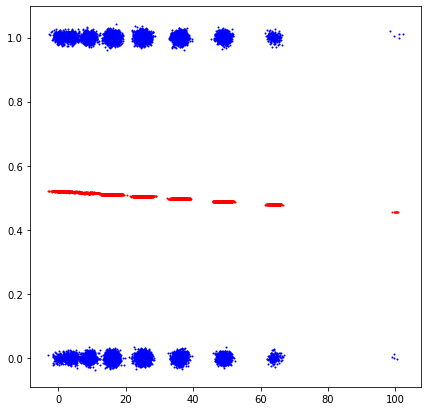

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_knock_cache_$_num_load_cards 

R^2:   0.0016023091215108254 




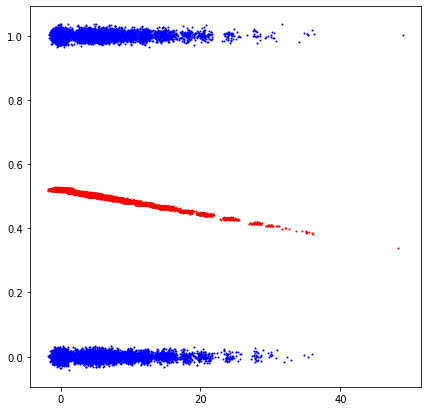

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_knock_cache_$_point_sum_load_cards 

R^2:   0.001591722683962682 




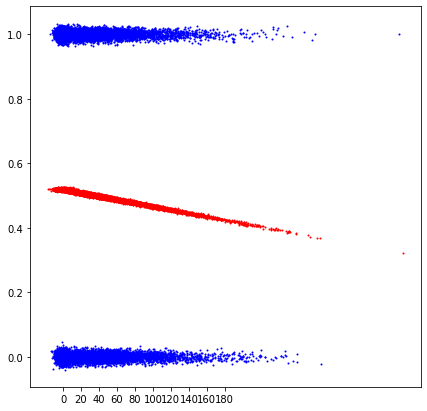

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_knock_cache_$_turns_taken 

R^2:   0.00017929655039172765 




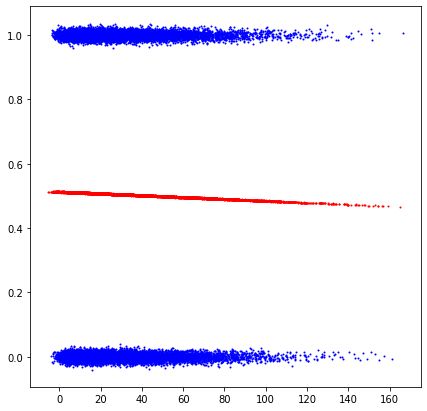

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_knock_cache_$_num_nearby_opponent_cards 

R^2:   0.0007982932725522085 




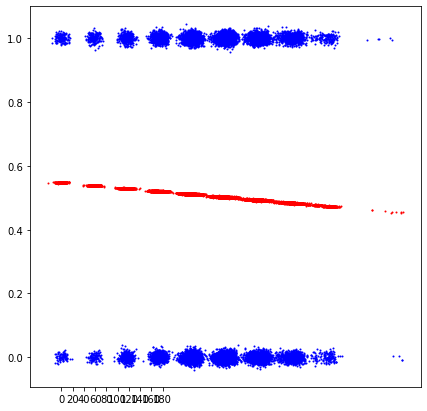

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_knock_cache_$_discard_danger 

R^2:   0.0004883806640487709 




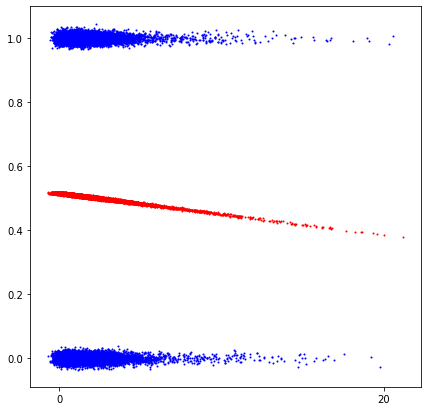

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_load_cards_$_num_load_cards 

R^2:   0.001097603572358663 




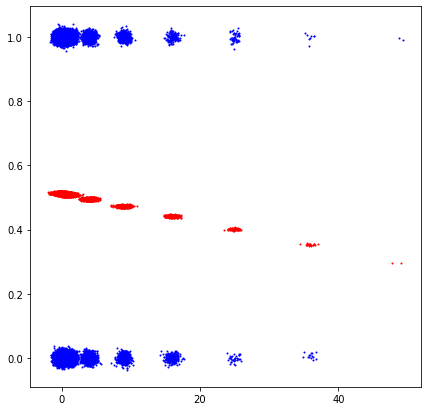

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_load_cards_$_point_sum_load_cards 

R^2:   0.0011147354338902904 




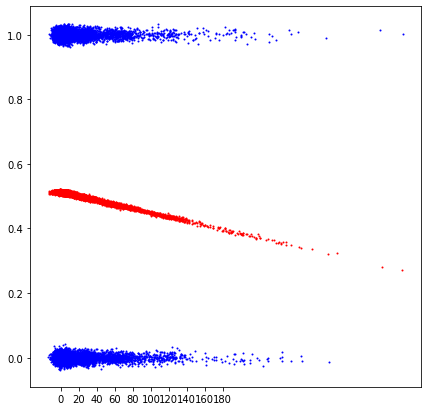

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_load_cards_$_turns_taken 

R^2:   0.0008292663718434401 




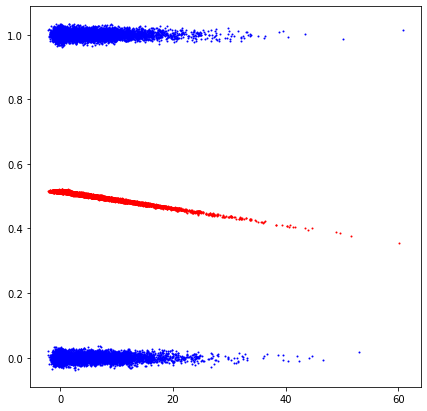

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_load_cards_$_num_nearby_opponent_cards 

R^2:   0.0016244075901568067 




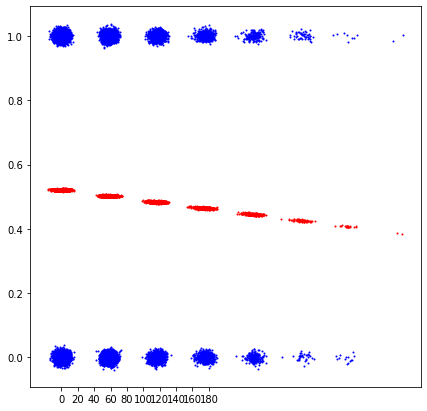

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_load_cards_$_discard_danger 

R^2:   0.0018136578853557017 




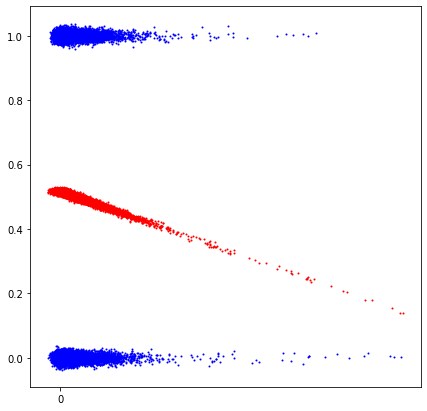

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_load_cards_$_point_sum_load_cards 

R^2:   0.0010824433964318203 




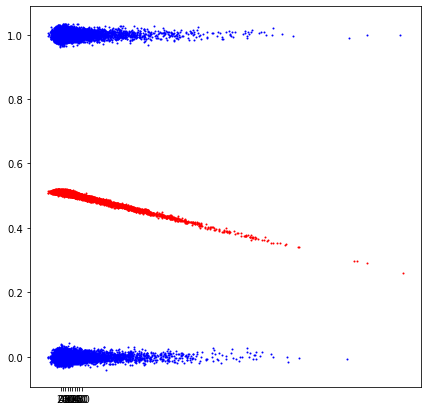

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_load_cards_$_turns_taken 

R^2:   0.0010562909933339304 




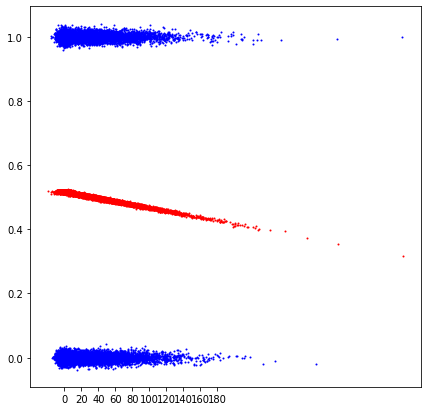

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_load_cards_$_num_nearby_opponent_cards 

R^2:   0.0016936786074448484 




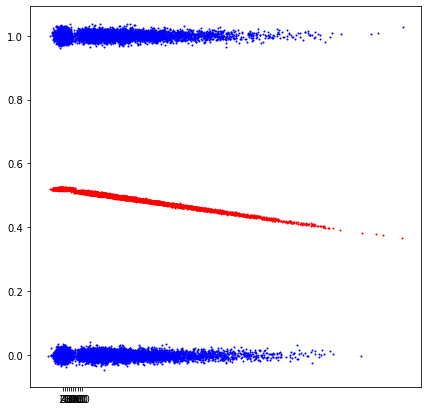

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
point_sum_load_cards_$_discard_danger 

R^2:   0.00193833598011528 




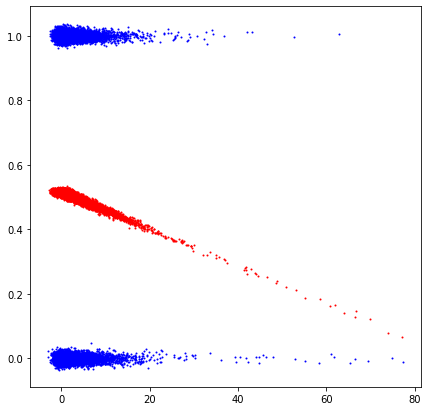

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
turns_taken_$_turns_taken 

R^2:   2.0531918972777063e-06 




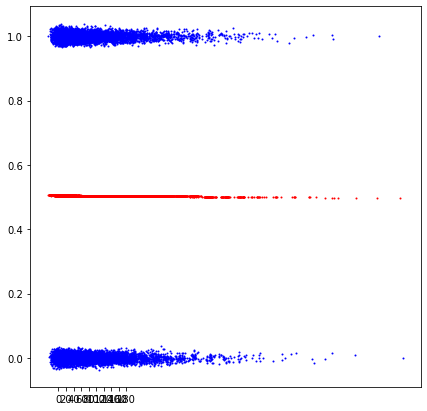

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
turns_taken_$_num_nearby_opponent_cards 

R^2:   1.2302493926918956e-06 




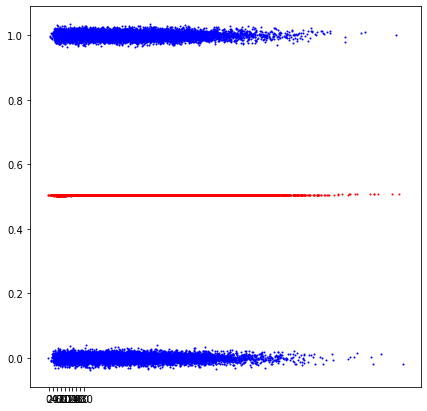

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
turns_taken_$_discard_danger 

R^2:   1.1486916360770039e-05 




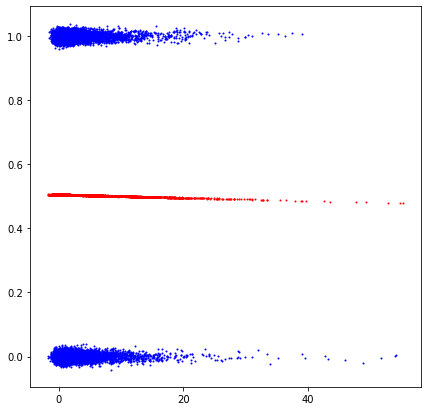

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_nearby_opponent_cards_$_num_nearby_opponent_cards 

R^2:   2.107911839299703e-05 




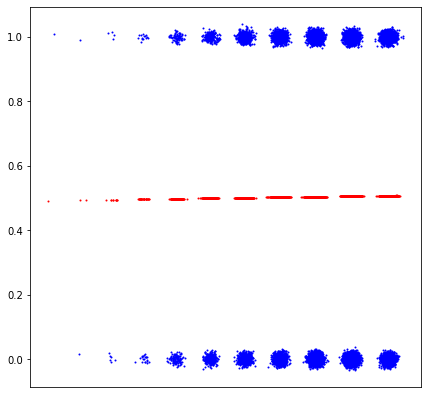

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
num_nearby_opponent_cards_$_discard_danger 

R^2:   0.0001326473666360961 




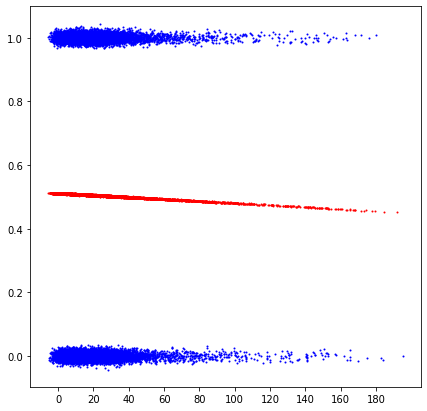

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
discard_danger_$_discard_danger 

R^2:   0.00019584652627380184 




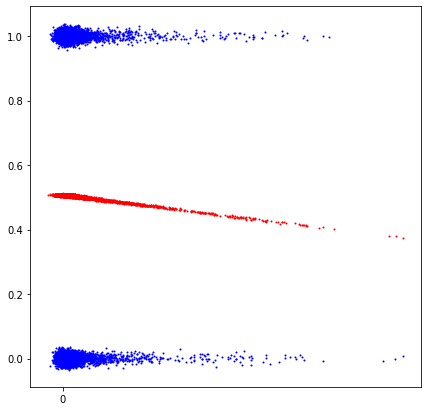

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [83]:
for feature in quadratic_features:
    
    print(feature, "\n")
    
    X = df2[[feature]]
    y = df2[[g]]           

    linear_regressor = LinearRegression()
    linear_regressor.fit(X, y)

    print("R^2:  ", linear_regressor.score(X, y), "\n\n")

    y_pred = linear_regressor.predict(X)


    def jitter(arr):
        stdev = 0.01 * (max(arr) - min(arr))
        return arr + np.random.randn(len(arr)) * stdev

    fig = plt.figure(figsize=(7,7))
    plt.xticks(range(0,200,20))
    plt.scatter(jitter(X[[feature]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
    plt.scatter(jitter(X[[feature]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
    plt.show()

    print("----" * 100)

# logistic

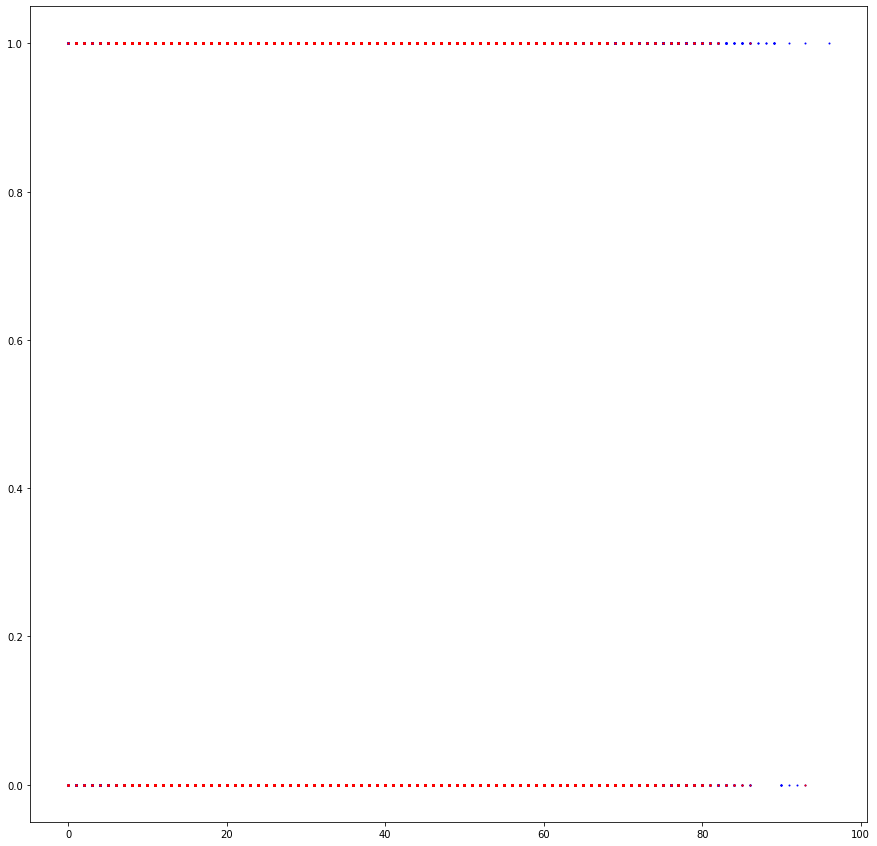

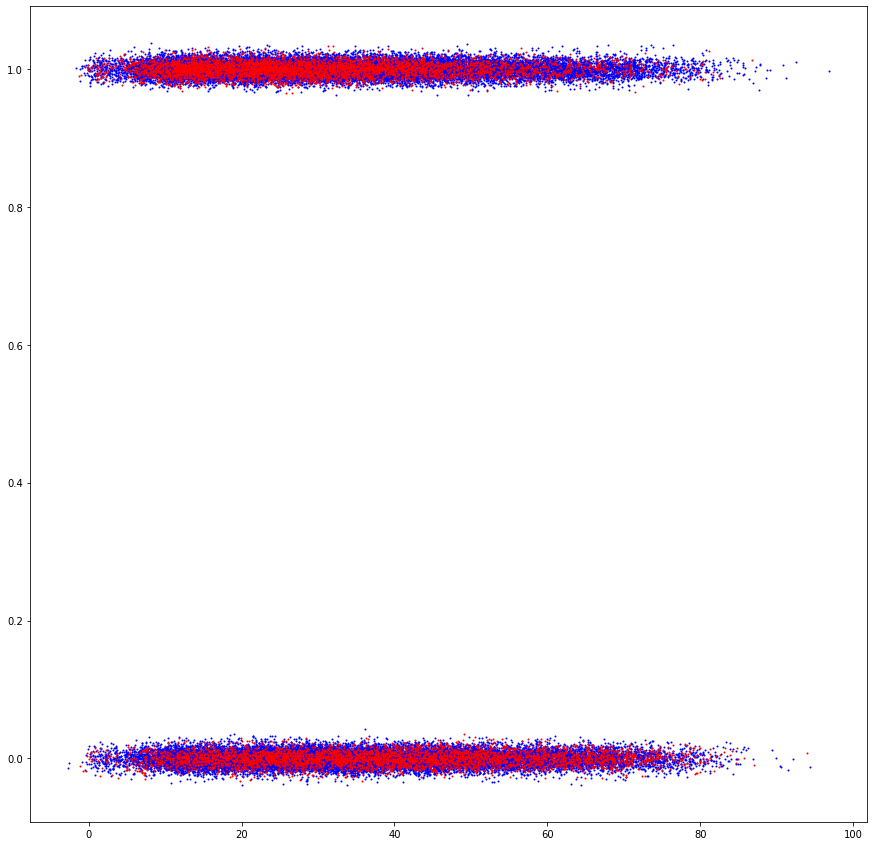

In [21]:
X = df[f]
y = df[["is_current_player_game_winner"]]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train.values.T[0])
y_pred=logistic_regression.predict(X_test)

model = LogisticRegression().fit(X_train, y_train.values.T[0])

predictions = model.predict(X_test)


fig = plt.figure(figsize=(15,15))
plt.scatter(X[['current_player_deadwood']], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X_test[['current_player_deadwood']].values.T[0], predictions, s=1, color='red')
plt.show()

fig = plt.figure(figsize=(15,15))
plt.scatter(jitter(X[['current_player_deadwood']].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X_test[['current_player_deadwood']].values.T[0]), jitter(predictions), s=1, color='red')
plt.show()

# Neural Network

In [16]:
from keras.models import Sequential, load_model
from keras.layers import Dense

X = df[f].values
y = df[[g]].values

model = Sequential()
model.add(Dense(len(X[0]), input_dim=len(X[0]), activation='sigmoid'))
model.add(Dense(len(X[0])//2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(X, y, epochs=50, batch_size=15)

Epoch 1/50
33859/33859 [==============================] - 1s 40us/step - loss: 0.6599 - accuracy: 0.6223
Epoch 2/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.5132 - accuracy: 0.7788
Epoch 3/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4841 - accuracy: 0.7801
Epoch 4/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4740 - accuracy: 0.7796
Epoch 5/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4698 - accuracy: 0.7813
Epoch 6/50
33859/33859 [==============================] - 1s 36us/step - loss: 0.4679 - accuracy: 0.7792
Epoch 7/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4671 - accuracy: 0.7791
Epoch 8/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4664 - accuracy: 0.7793
Epoch 9/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4659 - accuracy: 0.7804
Epoch 10/50
33859/33859 [==============================

In [9]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

33859/33859 [==============================] - 0s 7us/step
Accuracy: 78.10


In [10]:
model.save("gamma.h5")

In [4]:
import keras
import numpy as np

In [5]:
m = keras.models.load_model("../GinRummyAI/regression_models/gamma.h5")

In [6]:
m.predict(np.array([[ 0.,  0., 69.,  6.,  1.]]))[0][0]

0.383214

In [26]:
X[[0]]

array([[ 0.,  0., 60.,  9.,  0.]])

In [7]:
help(m)

Help on Sequential in module keras.engine.sequential object:

class Sequential(keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  # Arguments
 |      layers: list of layers to add to the model.
 |      name: Name given to the model
 |  
 |  # Example
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model

In [244]:
for obj in model.weights:
    print(obj.numpy().T, "\n")

[[-0.10649802  0.09712528 -0.01368238  0.34301138 -0.05350536]
 [-0.08400655  0.09604126  0.06177868 -0.6259904   0.26682198]
 [ 0.17847039 -0.02682551 -0.00693896 -0.8394289  -0.22979254]
 [-0.57901204  0.51400864  0.22103995 -0.26751083  0.48125052]
 [ 0.3647178  -0.6540233  -0.13085656  0.4855501   0.16004123]] 

[-3.418664   -2.8350232  -4.7416153  -1.2332332  -0.11645204] 

[[ 1.6262398   0.9956975   1.043168    0.03291409 -2.0053866 ]
 [-1.6058668  -1.1802657   1.6791301  -0.51399213  0.50049734]] 

[-0.18092276  0.69219935] 

[[-1.4306599  1.4407469]] 

[-0.00559682] 



m|a|t|r|i|x
&
vector

||

m|a|t|r|i|x
&
vector
||
.
.
.
||
m|a|t|r|i|x
vector